# Programming for Data Analysis 2019 Project

# Table of Contents
- Project Overview
- Goal of the project
- Real World Phenomenon chosen
- Simulation overview
- Data and Research
- project plan

## Project Overview:
For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose.
Specifically, in this project you should:
- Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
- Investigate the types of variables involved, their likely distributions, and their relationships with each other.
- Synthesise/simulate a data set as closely matching their properties as possible.
- Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.
Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own files. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set. 
***

### Goal of the project
The end goal of this project is to simulate a real-world phenomenon across at least one hundred data points across at least 4 different variables.

A dataset must be simulated or synthesised. The instructions note that it is ok to base the synthesised dataset on an actual real-world dataset but the main task is to  create a synthesised data set.

In this notebook I aim to fulfil the four specifications here. The notebook may not be broken up into 4 distinct sections. Instead I will keep these specifications in mind.

1. Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
The real-world phenomenon is the World Happiness Score. 

### Real World phenomenon chosen:
I have chosen to look at the happiness scores as reported in the World Happiness Report as the real world phenomenon.
The first World Happiness Report was published in 2012, the latest in 2019. The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be.

Increasingly, happiness is considered to be the proper measure of social progress and the goal of public policy.
Happiness indicators are being used by governments, organisations and civil society to help with decision making. Experts believe that measurements of well-being can be used to assess the progress of nations. The World Happiness reports review the state of happiness in the world and show how the new science of happiness explains personal and national variations in happiness.

The underlying source of the happiness scores in the World Happiness Report is the Gallup World Poll - a set of nationally representative undertaken in many countries across the world. The main life evaluation question asked in the poll is based on the Cantril ladder. Respondents are asked to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. The rankings are from nationally representative samples, for the years 2016-2018.

Happiness and life satisfaction are considered as central research areas in social sciences.

The variables on which the national and international happiness scores are calculated are very real and quantifiable. These include socio-economic indicators such as gdp, life expectancy as well as other life evaluation questions regarding freedom, perception of corruption, family or social support.
Differences in social support, incomes and healthy life expectancy are the three most important factors in determining the overall happiness score according to the World Happiness Reports.


2. Investigate the types of variables involved, their likely distributions, and their relationships with each other.

First I will look at the variables to be simulated and their likely distributions and how they relate to each other. This will help create a simulated dataset that is as close to the real world phenomenon as possible, within reason of course!.
The variables involved are as follows:
- overall happiness rank
- overall happiness score
- GDP per capita
- Family / Social support
- Healthy / Life Expectancy
- Freedom
- Generosity
- Perceptions of Corruption

3. Synthesise/simulate a data set as closely matching their properties as possible.

4. Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

There is much global and regional variation in these quantities and this must be taken into account when attempting to simulate data. For this reason I will be looking at the distribution of the underlying variables at a regional level as well as a global level. It is also likely that some of these variables will be correlated with each other and therefore this must be taken into account when simulating the data. 



### Real-world phenomenon chosen: World Happiness scores and rankings
#### 1.  Choose a real-world phenomenon that can be measured and for which you could collect at least one hundred data points across at least four different variables.

The aim of the World Happiness report is to see what countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness. Over the years the reports looked at how country ranks and scores changed and whether any country experienced a significant increase or decrease in happiness.

The researchers studied how 6 different factors contribute to the happiness scores and the extent of each effect. 
These are economic production, social support, life expectancy, freedom, absence of corruption, and generosity. They looked at how these factors contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. 
While these factors have no impact on the total score reported for each country, they were analysed to explain why some countries rank higher than others.
These factors describe the extent to which these factors contribute in evaluating the happiness in each country.

##### Economic production/ GDP per capita, Social support / Family, Life Expectancy, Free/Freedom, Trust/ Absence of corruption and Generosity:

Each year the report has focused in on a different aspect of the report. This info is based on the blurb for each report.

- 2012: The first report reviewed the state of happiness in the world today and showed how the new science of happiness explains personal and national variations in happiness.
- 2013: The second World Happiness Report further focuesed on well-being as a critical component of how the world measures its economic and social development.
- 2015: This report looked at the changes in happiness levels in 158 countries and examined the reasons behind the statistics. 
- 2016: This year the World Happiness Report looked at the measurement and consequences of inequality in the distribution of well-being among countries and regions.
- 2017: This report emphasized the importance of the social foundations of happiness.
- 2018: The main focus of this year’s report was on migration within and between countries.
- 2019: The latest World Happiness Report focuses on happiness and the community looking at how happiness has evolved over the past dozen years. It focused on the technologies, social norms, conflicts and government policies that have driven those changes.


### move this:
The overall happiness scores and ranks were calculated after a study of the underlying variables. 
The Happiness Score is the sum of the Dystopia and Explained by Variables as calculated by the researchers.
The actual variables used to calculate the scores are in the bigger sheet Table 2.1 of the excel file. These variables will be the focus of this project.

### Available Data and research
The World Happiness Reports and data are available from the [Worldhappiness](https://worldhappiness.report) website.
The latest report is [The World Happiness Report 2019](https://worldhappiness.report/ed/2019/).
Reports are available for each year from 2011 onwards. 
[Kaggle](https://www.kaggle.com) also hosts the [World Happiness datasets](https://www.kaggle.com/unsdsn/world-happiness#2016.csv) for the reports from 2015 to 2019.

The World Happiness Report is available for each year from 2012 to 2019 containing data for the prior year.
For each year there is an excel file with several sheets including one sheet with annual data for different variables over a number of years and other sheets containing the data for the calculation of the World Happiness score for that year. 
Some of the data such as Log GDP per capita are forecast from the previous years where the data was not yet available at the time of the report.



# project plan

- Simulating data: find out what this involves and why you do it.

- learn what to look for when studying the real life phenomenon the simulated data is based on:
    - descriptive statistics
    - plots
    - scatterplots to show relationships between variables
    - correlation and covariance statistics.
    
- Look at some actual real world data
    - collect the data
    - clean the data
    - investigate the data
    
- start simulating data
    
The first part of this project involves collecting some actual data points for the real-world phenomenon I have chosen to simulate data for.

First I will look at the data that has been used for these reports over the past few years from 2012 to 2019 but I will focus on the latest report of 2019. 

I will look at the type of variables involved, their distributions and whether and how they are related to each other.

### Summary of work so far:

I have added the Region to the data in order to look at the distributions across regions. There is quite a large disparity across the world.

For the world as a whole, the distributions can be normally distributed but when the global population is split into ten geographic regions, the resulting distributions vary greatly in both shape and average values.

The distributions for the variables have been plotted using boxplots by region. 

I looked at what sample statistics of the dataset can tell you about the population parameters.
I also looked at simulating using a loop and also using the bootstrap to simulate from the sample dataset with replacement on Life ladder.

- Life ladder can be simulated using random normal distribution as the data appears to be normally distributed.
- Social support is not normally distributed. It is left skewed. I have used the bootstrap resampling method for this.

***
## Collect and investigate real world data:

The next section here looks at getting the data ready to be analysed for the purposes of this simulation project.
The data is available in excel and csv files. As the files for 2018 data did not include the geographic regions of the countries studied, I had to add these to the data. Some other manipulation such as renaming columns, dropping unnecessary columns, adding region codes follows in the next section. The end result of this is written to csv files. Therefore the next step could be skipped and the file read in from the data folder in this repository.


#### Load Python Libraries:

In [1]:
# import libraries using common alias names
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# check what version of packages are installed.
print("NumPy version",np.__version__, "pandas version ",pd.__version__, "seaborn version",sns.__version__  )  # '1.16.2'

# set print options with floating point precision if 4, summarise long arrays using threshold of 5, suppress small results
np.set_printoptions(precision=4, threshold=5, suppress=True)  # set floating point precision to 4
pd.options.display.max_rows=16 # set options to display max number of rows


NumPy version 1.16.2 pandas version  0.24.2 seaborn version 0.9.0


#### Get the real dataset and prepare for analysis:
The data is available online at the [Worldhappiness](https://worldhappiness.report) website and also on [Kaggle Datasets](https://www.kaggle.com/unsdsn/world-happiness#2016.csv).
Kaggle has the data in csv format for each each year from 2015 to 2019. The data on the WorldHappiness website is in an excel file.
I have downloaded both the latest csv and excel files to this repository. 
The data is available in an excel file under Downloads section on the [World Happiness Report 2019](https://worldhappiness.report/ed/2019/) at <https://s3.amazonaws.com/happiness-report/2019/Chapter2OnlineData.xls>.

There is a sheet called Figure2.6 which contains the main variables used in the 2019 report. This is the same data that is on the kaggle website. The data is contained in columns A to K while the remaining columns contain actual tables and figures used in the report. This data is the main focus. 

There is another sheet called Table2.1 which contains all the cumulative data from 2008 up to 2019. This data provides more detail.

The reports contain data for the previous year so I am really looking at 2018 data in the 2019 reports.

In [2]:
!ls data

2015.csv                                WHR2018Chapter2OnlineData.xls
Chapter2OnlineData2019.xls              WHR_Data_2016report.csv
Figure2_6.csv                           WHR_Data_2019report.csv
HappyPlanet16.csv                       WorldHappinessData2018.csv
Online-data-for-chapter-2-whr-2016.xlsx hpi-data-2016.xlsx
Table2_1.csv                            world-happiness


#### Read in the data and investigate.

In [3]:
# read in the Kaggle data for 2018
df19 = pd.read_csv("data/world-happiness/2019.csv")
# kaggle data for 2018
df19.head(3)
print(df19.shape)
df19.columns

(156, 9)


Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [4]:
# read the data directly from the url or alternatively from the data folder in this repository
url="https://s3.amazonaws.com/happiness-report/2019/Chapter2OnlineData.xls"
# The entire data from Table2.1 sheet
WH = pd.read_excel(url, sheet_name='Table2.1')
# The data from the sheet Figure2.6, columns A to K
whr18 = pd.read_excel(url,sheet_name='Figure2.6', usecols="A:K")

In [5]:
# alternatively import the data from the data folder in this repository

# The entire data from Table2.1 sheet
Table2_1 = pd.read_excel('data/Chapter2OnlineData2019.xls', sheet_name='Table2.1', usecols="A:S")
# The data from the sheet Figure2.6, columns A to K
Fig2_6 = pd.read_excel('data/Chapter2OnlineData2019.xls',sheet_name='Figure2.6', usecols="A:K")

# the 2019 data, same values as Kaggle data except not including the rank but including the whiskers or intervals
print("The shape of the data from Table2.1 is: \n",Table2_1.shape)
print("The shape of the data from Figure 2.6 is: \n",Fig2_6.shape)

# create a subset of Table2_1 with data for 2018 only
tl18=Table2_1[Table2_1['Year']==2018]
print("The shape of the data from Table 2.1 for 2018 only is :\n",tl18.shape)

print("\n Table2.1\n",Table2_1.describe(include="object"))
print("\n Fig2.6\n",Fig2_6.describe(include="object"))
print("\n Table2.1 for 2018\n",tl18.describe(include="object"))

The shape of the data from Table2.1 is: 
 (1704, 19)
The shape of the data from Figure 2.6 is: 
 (156, 11)
The shape of the data from Table 2.1 for 2018 only is :
 (136, 19)

 Table2.1
        Country name
count          1704
unique          165
top         Germany
freq             13

 Fig2.6
        Country
count      156
unique     156
top      China
freq         1

 Table2.1 for 2018
        Country name
count           136
unique          136
top           China
freq              1


There are 165 rows in Table 2.1 and 156 rows in Figure2.6.
Table 2.1 contains the data on which the happiness scores in Table 2.6 are calculated.
Next looking to see if the same countries are included.
The variable is 'Country name' in Table2.1 and 'Country' in Figure2.6.
It looks like Table 2.1 does not contain data for all countries for 2018. However some values have been based on previous years.
Sudan, Suriname and Angola are in Table 2.1 but not in Figure 2.6.
This doesn't really matter for this project as there are enough similar countries.

```python
# look at the top 3 rows of both dataframes
print("Table2.1",Table2_1.head(3))
print("\nFigure2.6",Fig2_6.head(3))
```
```python
# checking to see which countries are not in both dataframes
print(Table2_1[~Table2_1['Country name'].isin(Fig2_6['Country'])])
print(Fig2_6[~Fig2_6['Country'].isin(Table2_1['Country name'])])
```

### Adding Regions:

For the world as a whole, the distributions can be normally distributed but when the global population is split into ten geographic regions, the resulting distributions vary greatly in both shape and average values. Therefore it is important to look at the regions when analysing this dataset.

The 2015.csv file on Kaggle contains the Region in addition to the country. The csv files for the other years do not contain the Region nor does the excel files on the World Happiness report site.
I will add these regions in to the files I am working with. Some of the country names might be a bit different.
I added the regions to the file and exported as csv. See countryregion.ipynb notebook
I have added the Region to the data in order to look at the distributions across regions. There is quite a large disparity across the world.
I will merge the 2015 csv file from Kaggle containing the Regions to my data using [pandas `merge` with a right join](
https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/). 


In [6]:
# read in the kaggle dataset for 2015 as this contains the Regions as well as the country names.
k15 = pd.read_csv("data/2015.csv")
print(k15.columns)
# extract the country and regions from the 2015 file:
Regions = k15.loc[:,['Country','Region']]
Regions.head()
Regions.shape # 158 rows
# see how many unique regions and countries
Regions.describe(include="object")
# rename the country names variable so that it matches the country column in Table2.1
Regions.rename(columns={'Country':'Country name'}, inplace=True)
print(Regions.columns)
# set the indexes in each dataframe and then join based on the country names
# DataFrame.join(self, other, on=None, how='left', lsuffix='', rsuffix='', sort=False)[source]
df=pd.merge(Regions, Table2_1,on='Country name',how='right')
df.describe()
df.head(3)

# There should now be two non-numeric variables in the dataset. Country name and Region
df.describe(include="object")

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
Index(['Country name', 'Region'], dtype='object')


,Country name,Region
count,1704,1667
unique,165,10
top,China,Sub-Saharan Africa
freq,13,364


Good to go. I now have a dataframe `df` containing the data from Table 2.1 in the World Happiness Report of 2019 with the regions added. 
I will add the regions to the Figure 2.6 data also.
There are some countries in the dataset that do not have a Region value as these countries were not included in the 2015 dataset. I will look up the geographic region and then add them to the dataframe, replacing the NaN values.

In [7]:
# rename the country name back to Country to match the Figure 2.6 data
Regions.rename(columns={'Country name':'Country'}, inplace=True)
print("The variables in the Figure 2.6 dataset \n",Fig2_6.columns)
# set the indexes in each dataframe and then join based on the country names
# DataFrame.join(self, other, on=None, how='left', lsuffix='', rsuffix='', sort=False)[source]
df6=pd.merge(Regions, Fig2_6,on='Country',how='right')
#look at first 3 rows
df6.head(3)
# get the dimensions
df6.shape

The variables in the Figure 2.6 dataset 
 Index(['Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.88) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')


(156, 12)

#### Add the missing region values:

In [8]:

# find how many rows have missing values for Region
df['Region'].isna().sum()
# print the rows with missing Region valuesBelize
df.loc[df.loc[:,'Region'].isna()]

# update the value of Region for the following countries
df.loc[df['Country name']=="Taiwan Province of China",['Region']]="Southeastern Asia"
df.loc[df['Country name']=="Namibia",['Region']]="Sub-Saharan Africa"
df.loc[df['Country name']=="Somalia",['Region']]="Sub-Saharan Africa"
df.loc[df['Country name']=="Hong Kong S.A.R. of China",['Region']]="Southeastern Asia"
df.loc[df['Country name']=="South Sudan",['Region']]="Sub-Saharan Africa"
df.loc[df['Country name']=="Gambia",['Region']]="Sub-Saharan Africa"
df.loc[df['Country name']=="Belize",['Region']]="Latin America and Caribbean"
df.loc[df['Country name']=="Cuba",['Region']]="Latin America and Caribbean"
df.loc[df['Country name']=="Guyana",['Region']]="Latin America and Caribbean"
# checking to make sure all regions have values now
df['Region'].isna().sum()

0

In [9]:
# find how many rows have missing values for Region
df6['Region'].isna().sum()
# print the rows with missing Region valuesBelize
df6.loc[df6.loc[:,'Region'].isna()]
# update the value of Region for the following countries
df6.loc[df6['Country']=="Taiwan Province of China",['Region']]="Southeastern Asia"
df6.loc[df6['Country']=="Namibia",['Region']]="Sub-Saharan Africa"
df6.loc[df6['Country']=="Somalia",['Region']]="Sub-Saharan Africa"
df6.loc[df6['Country']=="Hong Kong S.A.R. of China",['Region']]="Southeastern Asia"
df6.loc[df6['Country']=="South Sudan",['Region']]="Sub-Saharan Africa"
df6.loc[df6['Country']=="Gambia",['Region']]="Sub-Saharan Africa"
df6.loc[df6['Country']=="Belize",['Region']]="Latin America and Caribbean"
df6.loc[df6['Country']=="Cuba",['Region']]="Latin America and Caribbean"
df6.loc[df6['Country']=="Guyana",['Region']]="Latin America and Caribbean"
# checking to make sure all regions have values now
df6['Region'].isna().sum()

0

#### Write the datasets with the Regions added to csv files:

In [10]:
# write the dataframes to a csv files:
df.to_csv("data/Table2_1.csv")
df6.to_csv("data/Figure2_6.csv")

In [11]:
# check what files in my data folder:
!ls data

2015.csv                                WHR2018Chapter2OnlineData.xls
Chapter2OnlineData2019.xls              WHR_Data_2016report.csv
Figure2_6.csv                           WHR_Data_2019report.csv
HappyPlanet16.csv                       WorldHappinessData2018.csv
Online-data-for-chapter-2-whr-2016.xlsx hpi-data-2016.xlsx
Table2_1.csv                            world-happiness


### Read in the cleaned datasets for analysis:

Note that Table 2.1 data includes some rows where there are some missing values as there were some countries added to the World Happiness Report in recent years for which the data was not available.
Also some of the data in Table 2.1 was not available for 2018 at the time of the 2019 report being published. Some imputation was used or some interpolation from previous years values.
[Statistical Appendix 1 for Chapter 2](https://s3.amazonaws.com/happiness-report/2019/WHR19_Ch2A_Appendix1.pdf) of the World Happiness Report for 2019 outlines how imputation is used for missing values when trying to decompose a country's average ladder score into components explained by the 6  hypothesized underlying determinants (GDP per person, healthy life expectancy, social support, perceived freedom to make life choice, generosity and perception of corruption).

All the data I am using to figure out the distribution of variables have now been cleaned
- df6: This contains the data from Figure 2.6 of the World Happiness Report with region values added
- df:  This contains the data from Table 2.1 of the World Happiness Report with region values added
- df18: This contains the data from Table 2.1 filtered for 2018.


In [12]:
# read in the Table 2.1 data back in, set the index_col to be the first column
df = pd.read_csv("data/Table2_1.csv", index_col=0)
data18= pd.read_csv("data/Figure2_6.csv", index_col=0)
# look at top and bottom rows to see it all looks ok
df.tail(2)
df.head(2)

# Create a dataframe with 2018 data from the Table 2.1 of the World Happiness Report 2019:
df18=df.loc[df.loc[:,'Year']==2018]
print("shape of the dataframe", df18.shape)
df18.tail(2)

shape of the dataframe (136, 20)


,Country name,Region,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year"
1685,Namibia,Sub-Saharan Africa,2018,4.834088,9.156214,0.864215,56.5,0.753905,-0.175729,0.845942,0.739387,0.240249,0.624468,NaN,NaN,2.101938,0.434816,NaN,0.611333,0.771211
1703,Taiwan Province of China,Southeastern Asia,2018,6.467005,NaN,0.896459,NaN,0.741033,NaN,0.735971,0.848399,0.092696,0.311723,NaN,NaN,1.690886,0.261464,NaN,NaN,0.330178


In [13]:
# I just changed this when checking which rows were missing regions
#pd.options.display.max_rows=8 # set options to display max number of rows

In [14]:
print(df6.shape,df.shape,df18.shape) # 156 rows with the happiness score and the 6 main determinants of the score


(156, 12) (1704, 20) (136, 20)


Now the data is ready to be investigated but first a look at why and how data is simulated.

***
## Data simulation:

Simulating data is useful for a variety of reasons. Monte carlo simulation are used to simulate real world problems using repeated random sampling.
Data can be simulated before the real world data is collected to help identify the type of tests and programs that need to be run. It can help you become familiar with the kinds of data and their distributions and make reasonable and informed assumptions about the data. By studying the simulated data you can make more informed decisions on what to do with the data, how to measure it, how much is needed. 
Collecting data requires resources of time and money whereas data can be simulated easily using computer programs. Statistical analysis can be performed on simulated data in advance of collecting the real data. This process can be repeated as many times as needed.

Simulated data is also very useful for learning and demonstration purposes. 

When data is collected, it is often only a small sample of data from the overall population of interest. 

Numbers come from a distribution and some numbers will occur more often than others depending on the type of distribution. A sample is a subset of numbers from a distribution and the bigger the sample size the more it resembles the dsitribution from which it is drawn. 

Sample statistics can be calculated from the sample dataset which can be used to make inferrences about the population. The population parameters are of most interest. These are the characteristics of the actual population from which a sample dataset is taken.  Samples are used to estimate the parameters of the population. A sample statistic is a description of the data. It can be used as an estimate of the population parameter.

The law of large numbers refers to how as a sample size increases (approaches infinity) the sample mean gets closer to the true population mean. Under the law of large numbers the more data that is collected, the closer the sample statistics will get to the actual true population parameters.

The sample mean is the mean of the numbers in the sample. The population mean is the mean of the entire population but it is not always possible to study the entire population directly. The sampling distribution of the sample means is when you collect many samples from the population and calculate the sample means on each sample. If you know the type of distribution you could sample some data from this distribution, calculate the means (or another sample statsitic) of the samples and plot them using a histogram to show the distribution of the sample statistic.

The sampling distributions can tell you what to expect from your data. Simulation can be used to find out what the sample looks like if it comes from that particular distribution. This information can be used to make inferences about whether the sample came from particular distribution or not.

The sampling distribution of a statistic varies as a function of sample size. Small sample taken from the distribution will probably have sample statistics such as sample means that vary quite a bit from sample to sample and therefore the sampling distribution will be quite wide. Larger samples are more likely to have similar statistics and a narrower sampling distribution.  

As the size of the samples increases, the mean of the sampling distribution approaches the mean of the population. The sampling distribution is a distribution and has some variance.
The standard deviation of the sampling distribution is known as the standard error. As the sampple size increases, the standard error of the sample mean decreases. According to the central limit theorem, as the sample size increases the sampling distribution of the mean begins to look more like a normal distribution, no matter what the theshape of the population distribution is.

- The mean of the sampling distribution is the same as the mean of the population.
- the standard deviation of the sampling distribution gets smaller as the sample size increases.
- The shape of the sampling distributiion becomes normal as the sample size increases.


[Section 4.12]()

If a population distribution has mean $\mu$ and standard deviation $\sigma$, then the sampling distribution of the mean also has mean $mu$ and the standard error of the mean is $\frac{\sigma}{sqrt(N)}$. The standard error of the sampling mean gets smaller as the sample size increases. (dividing by the square root of the sample size N).

All this means that large experiments are more reliable than smaller ones.  If you take a big enough sample, the sample mean gives a very good estimate of the population mean. 

[section 4.13.5] for difference betweem sample mean. true population mean and estimates of the population mean symbols.


>Experiments are a structured way of collecting data that can permit inference about causality. 
[crumplab 5.1]()





### more notes on simulation...

Simulation can involves repeated random sampling to get an approximate solution. A random sample is generated and this process can be repeated many times to see how often you would expect to get the outcome you did get. Repeating the process gives multiple outcomes. Can then get the average across all simulations.

Simulations produce multiple sample outcomes. Experiments can be run by modifying inputs and seeing how this changes the output.
If there are multiple variables with relationships between the variables, then 
#### Simulation steps:
1. define possible outcomes for random variables. (use sample statistics from the sample dataset)

#### resampling methods
Bootstrapping is the most common.
This involves sampling with replacement. 

I have 138 observed Life Ladder scores 'Life Ladder' variable in df18.
Draw a random sample with replacement from 'Life Ladder'.

#### T-tests
The one-sample t-test is used to estimate the chances that the sample came from a particular distribution.
As the sample mean is considered an unbiased estimator for the population mean, it can be used in the t-test formula in place of the population parameter. 

The t-test is a measure of the sample mean divided by the standard error of the sample mean.
The estimated standard error equals the standard error of the sample = s / square root N

t = (Sample mean - population mean) / sample standard error.
t gives a measure of the confidence.

Take a sample of the data (the dataset) and looked at the mean and the standard deviation. Studied the distribution using the histogram and through this learn the properties of the data. Together the mean and the standard deviation can give a good description of the data. If the ratio of the mean to the standard deviation gives a big number then it gives more confidence that the mean is representative of the data whereas if it is small then less so.
The ratio of the mean of the sample to the variation in the sample.
The t-test is simular except the denominator is the standard error of the mean (which is the standard deviation of the sampling distribution of the mean).
t is a property of the data collected, computed using a sample mean and a sample standard error and therefore is a sample statistic.It is a measure of confidence and the bigger it gets the more confident we can be in the mean difference being measured.

- the sample standard deviation is the square root of the sample variance (using N-1)
- the standard error of the mean is the standard deviation divided by the square root of N.
SEM=s/square root of N.

t is the difference between the sample mean and the population mean divided by the standard error of the mean.
If you take different samples from the same distribution they will not be identical due to sampling error.
I could use the t-test to test whether the simulated sample comes from the same population as the data.
<https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/>

***
# Investigate the types of variables involved, their likely distributions, and their relationships with each other.

In this project I will focus on the main determinants of the Happiness scores as reported in the World Happiness reports. These are income, life expectancy, social support, freedom and generosity. The happiness scores and the world happiness ranks are recorded in Figure 2.6 of the 2019 report with a breakdown of how much each individual factor impacts or explains the happiness of each country studied rather than actual measurements of the variables. The actual variables themselves are in Table 2.1 of the World Happiness Report. There are some other variables included in the report which have a smaller effect on the happiness scores.

- Life Ladder
- Log GDP per capita / Income
- Social Support / Family
- Healthy Life Expectancy at birth
- Freedom to make life choices
- Generosity
- Perceptions of Corruption

### The distribution of the data: What does the real data look like?
In order to be able to simulate data I need to know more about the data and what it looks like. I will go through each of the variables in a sub-section of their own but I will first look at the summary statistics and some visualisations of the distribution of the most important variables in the datasets. I will look a the similarities in the data and the differences in the data. 

The distributions can be plotted to summarise the data visually using histograms and kernel density estimates plots.
The histogram is a distribution of the frequency counts across the bins. Distributions can have very different shapes and describe the data. 

This will show how some of the numbers group together, the location and shape of the data.
The height of the bars on a histogram indicate how much data there is, the minimum and maximum values show the range of the data. The width of the bars can be controlled by changing the bin sizes.

The central tendency shows how common certain numbers are,how similar data points are to each other and where the most data tends to be located while the variance shows the spread of the data and how different the data points are.


#### Central tendency measures:
- The most frequently occurring number in the dataset is the mode.
- The median is the middle number (s) in the data when they are ordered from smallest to largest.
- The mean is the average of the data. (It is also the only number that can replace every single number in the dataset:the mean times the number of observations gives the sum of the dataset).
- The mean can be influenced by very large or small numbers while the mode and median are not sensitive to larger numbers that do not occur very often.
The mean is the balancing point of the data - the location in the data where the numbers on one side sum to the same amount as the numbers on the other side.

#### Variance measures:

- The range is the width of the variation in the data, between the minimum and maximum or boundaries of the data. 
- The variance is the mean of the sum of the squared deviations of the data where the deviations is how far each values is from the mean.
- The standard deviation is the square root of the variance and is in the same size as the data itself.

### Correlation of the data variables.

- Measures such as the covariance and correlation can show how the data variables might be related to each. 
- Scatterplots can be used to see how two variables might be related to each other and the strength and directions of any such relationships that exist. 

Correlation is not the same as causation while lack of an obvious correlation does not mean there is no causation.
Correlation between two variables could be due to a confounding or third variable that is not directly measured.
Correlations can be caused by random chance - spurious correlations.

These are all things to consider when looking at data and when attempting to simulate data.

#### Subset the dataset to only look at the 6 variables. 
Here I first create a smaller dataframe from df18 called dfh containing the variables of interest.


In [15]:
#df18.iloc[:,0:7]
# drop year column as this only contains 2018 anyway.
## create a data frame dfh that contains only a subset of the columns from df
dfh = df18.loc[:,['Country name','Region','Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth']]
dfh.head()

,Country name,Region,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth
7,Switzerland,Western Europe,7.508587,10.975945,0.930291,74.099998
26,Denmark,Western Europe,7.648786,10.755594,0.958219,72.400002
34,Norway,Western Europe,7.444262,11.085626,0.965962,73.199997
47,Canada,North America,7.175497,10.701248,0.922719,73.599998
58,Finland,Western Europe,7.858107,10.636060,0.962155,71.900002


### Some plots to see what the real data looks like:

First a pairplot of the variables to see any relationships between variables that stand out:

### Pair Plots of the main variables in the dataset:

/Users/angelacorkery/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/angelacorkery/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


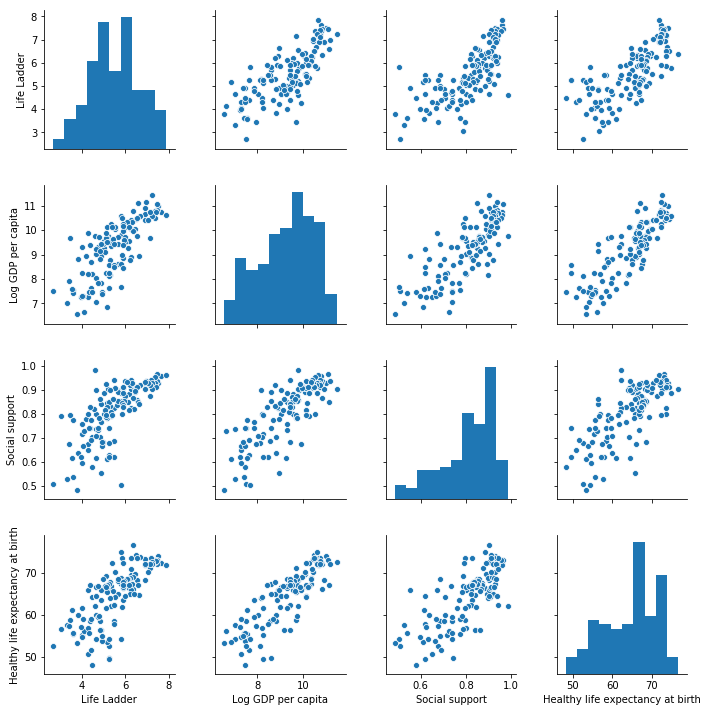

In [16]:
# pairplot of the variables
sns.pairplot(dfh.iloc[:,:6]);


The scatterplots in the pairplot above show that there seems to be a positive linear relationship between each of the variables Income (Log GDP per capita), Healthy Life Expectancy, Social support and satisfactions with life (Life Ladder).


The 2016 World Happiness Report notes how for the world as a whole, the distribution of world happiness is very normally distributed about the median answer of 5, with the population-weighted mean being 5.4. When the global population is split into ten geographic regions, the resulting distributions vary greatly in both shape and average values. Only two regions—the Middle East and North Africa, and Latin America and the Caribbean— have more unequally distributed happiness than does the world as a whole.

Therefore taking this into account it is important to look at the data on a regional basis. 


Distribution of Life satisfaction, Income and Social Support by region



/Users/angelacorkery/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/angelacorkery/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


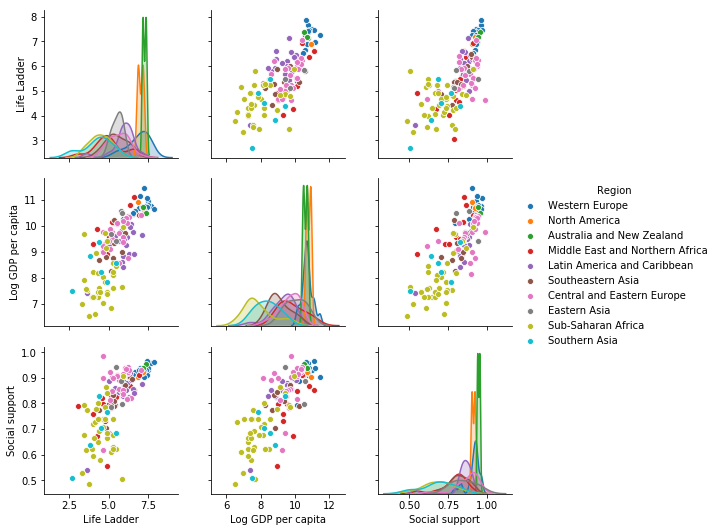

In [17]:
# pairplots showing the Region as the colour of the dots.
print("\nDistribution of Life satisfaction, Income and Social Support by region\n")
sns.pairplot(dfh.iloc[:,:5], hue="Region");

The pairplots show a distinction between the different regions for most variables. Sub-Saharan Africa stands out as a region that has far different levels of life satisfaction, income and life expectancy than most other regions.

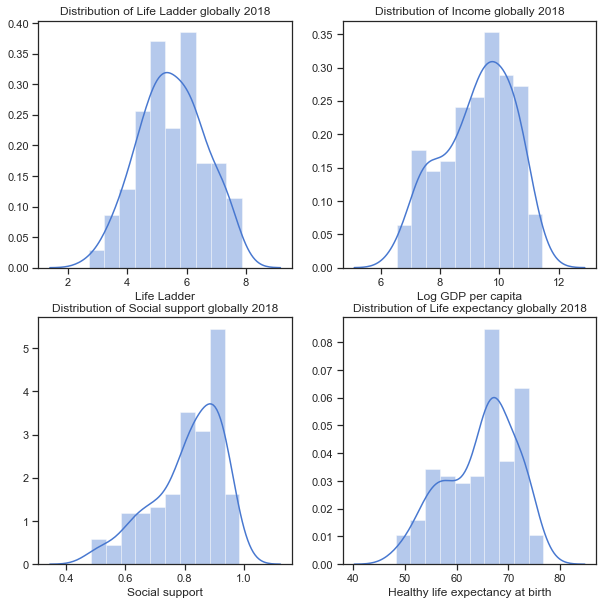

In [18]:
# set up the subplots, style and palette
sns.set(style="ticks", palette="muted")
f,axes=plt.subplots(2,2, figsize=(10,10))
# plot the distributions of each of the main variables. At global level first. Look at Regional after
sns.distplot(dfh['Life Ladder'].dropna(), ax=axes[0,0], bins=10);
# set axes title
axes[0,0].set_title("Distribution of Life Ladder globally 2018");
sns.distplot(dfh['Log GDP per capita'].dropna(), ax=axes[0,1], bins=10);
axes[0,1].set_title("Distribution of Income globally 2018");
sns.distplot(dfh['Social support'].dropna(), ax=axes[1,0], bins=10);
axes[1,0].set_title("Distribution of Social support globally 2018");
sns.distplot(dfh['Healthy life expectancy at birth'].dropna(), ax=axes[1,1], bins=10);
axes[1,1].set_title("Distribution of Life expectancy globally 2018");      

The distribution of Life Ladder variable looks to be normally distributed whiile there is some left skew in the other variables.
Normally distributed data is considered the easiest to work with as normal distributions can be compared by looking at their means and standard deviations. Many statistical methods assume variables are normally distributed and others work better with normality.
-[Sustainable Development lectures](http://www.columbia.edu/~so33/SusDev/Lecture_1.pdf)

## Statistics of variables for 2018 in the dataset at a global level:

### Central Tendency and variance of the variables.

Here are the summary statistics for the 2018 data, first showing the statistics for the individual variables and then below that the summary statistics for the happiness score and the effects of the different variables.

In [19]:
# summary statistics of the dataset (2018)- just showing the main variables of interest
print("The data available for 2018 only:")
dfh.iloc[:,0:6].describe()

The data available for 2018 only:


,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth
count,136.000000,127.000000,136.000000,132.000000
mean,5.502134,9.250394,0.810544,64.670832
std,1.103461,1.186589,0.116332,6.728247
min,2.694303,6.541033,0.484715,48.200001
25%,4.721326,8.346278,0.739719,59.074999
50%,5.468088,9.415703,0.836641,66.350002
75%,6.277691,10.166517,0.905608,69.075001
max,7.858107,11.453928,0.984489,76.800003


In [20]:
# summary statistics of the report Figure 2.6 data
df6.iloc[:,[2,6,7,8]].describe()

,Happiness score,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy
count,156.000000,156.000000,156.000000,156.000000
mean,5.407081,0.905108,1.208793,0.725258
std,1.113132,0.398357,0.299175,0.242144
min,2.852600,0.000000,0.000000,0.000000
25%,4.544600,0.602895,1.055672,0.548066
50%,5.379550,0.959741,1.271584,0.788698
75%,6.184250,1.232124,1.452774,0.881603
max,7.768900,1.684094,1.623651,1.140899


In [21]:
# summary statistics of data to data - just showing the main variables
df.iloc[:,3:7].describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth
count,1704.000000,1676.000000,1691.000000,1676.000000
mean,5.437155,9.222456,0.810570,63.111971
std,1.121149,1.185794,0.119210,7.583622
min,2.661718,6.457201,0.290184,32.299999
25%,4.610970,8.304428,0.747512,58.299999
50%,5.339557,9.406206,0.833098,65.000000
75%,6.273522,10.193060,0.904432,68.300003
max,8.018934,11.770276,0.987343,76.800003


## Region Analysis

Earlier I added the region name to the dataframe. Now I will add another column with a numeric code in order to be able to look at the correlations between the variables and the region. The pairplots above with the colour representing the regions the countries are in suggest that the measurements of these variables do vary by region.

To do this I will add a new column for the RegionCode that has the Region name to start and then [replace the string](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html?highlight=replace#pandas-series-str-replace) with the Region name in this new column with an integer from 1 to 10. (There is probably a better way of doing this - `where` did not work for me when there was 10 options to choose from).

#### How are countries split between the regions?

In [22]:
# just looking again at the proportion of countries over the 10 regions
df18.Region.value_counts()/len(df18.Region)

Sub-Saharan Africa                 0.250000
Central and Eastern Europe         0.191176
Western Europe                     0.147059
Latin America and Caribbean        0.132353
Middle East and Northern Africa    0.102941
Southeastern Asia                  0.073529
Southern Asia                      0.044118
Eastern Asia                       0.029412
Australia and New Zealand          0.014706
North America                      0.014706
Name: Region, dtype: float64

In [23]:
# add a new column called RegionCode with the Region 
dfh['RegionCode']=dfh['Region']
dfh.head()
# replace the new regionCode with a number for each region as follows:
dfh['RegionCode']=dfh["RegionCode"].replace("Sub-Saharan Africa",1)
dfh['RegionCode']=dfh["RegionCode"].replace("Central and Eastern Europe",2)
dfh['RegionCode']=dfh["RegionCode"].replace("Western Europe",3)
dfh['RegionCode']=dfh["RegionCode"].replace("Latin America and Caribbean",4)
dfh['RegionCode']=dfh["RegionCode"].replace("Middle East and Northern Africa",5)
dfh['RegionCode']=dfh["RegionCode"].replace("Southeastern Asia",6)
dfh['RegionCode']=dfh["RegionCode"].replace("Southern Asia",7)
dfh['RegionCode']=dfh["RegionCode"].replace("Eastern Asia",8)
dfh['RegionCode']=dfh["RegionCode"].replace("Australia and New Zealand",9)
dfh['RegionCode']=dfh["RegionCode"].replace("North America",10)

# convert to integer 
dfh["RegionCode"] = pd.to_numeric(dfh["RegionCode"])

### Central Tendency and spread by Region:

In [24]:
dfh.groupby(['RegionCode']).agg([np.mean, np.std])

Life Ladder           Log GDP per capita           Social support  \
                  mean       std               mean       std           mean   
RegionCode                                                                     
1             4.519969  0.677455           7.912544  0.886260       0.691773   
2             5.647239  0.616436           9.681240  0.608695       0.872249   
3             6.898085  0.680799          10.723670  0.323036       0.911804   
4             5.953038  0.754844           9.287006  0.672203       0.847512   
5             5.067794  1.039981           9.819217  0.725599       0.789676   
6             5.508884  0.660853           9.106808  0.637545       0.822206   
7             4.298909  0.959686           8.393112  0.687759       0.688764   
8             5.557466  0.329559          10.050819  0.584372       0.853319   
9             7.273640  0.136679          10.611249  0.155241       0.947000   
10            7.029091  0.207049          10.811857  0.156424       0.913287   

                     Healthy life expectancy at birth            
                 std                             mean       std  
RegionCode                                                       
1           0.098609                        55.827273  3.712418  
2           0.081660                        66.767301  2.199957  
3           0.045065                        72.810526  0.759308  
4           0.082015                        66.933334  3.375517  
5           0.089717                        65.600001  3.813354  
6           0.060913                        64.688889  5.710615  
7           0.110865                        61.033333  5.161266  
8           0.073675                        70.050000  5.707597  
9           0.009705                        73.399998  0.282844  
10          0.013338                        70.950001  3.747663

In [25]:
# mean and standard deviation at the global level in the dataset:
dfh.agg([np.mean, np.std])

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,RegionCode
mean,5.502134,9.250394,0.810544,64.670832,3.382353
std,1.103461,1.186589,0.116332,6.728247,2.231289


In [26]:
dfh.head()

,Country name,Region,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,RegionCode
7,Switzerland,Western Europe,7.508587,10.975945,0.930291,74.099998,3
26,Denmark,Western Europe,7.648786,10.755594,0.958219,72.400002,3
34,Norway,Western Europe,7.444262,11.085626,0.965962,73.199997,3
47,Canada,North America,7.175497,10.701248,0.922719,73.599998,10
58,Finland,Western Europe,7.858107,10.636060,0.962155,71.900002,3


In [27]:
dfh.groupby(['RegionCode']).describe()

Life Ladder                                                    \
                 count      mean       std       min       25%       50%   
RegionCode                                                                 
1                 34.0  4.519969  0.677455  3.334634  4.048763  4.451027   
2                 26.0  5.647239  0.616436  4.620602  5.184439  5.666234   
3                 20.0  6.898085  0.680799  5.409289  6.515738  7.040350   
4                 18.0  5.953038  0.754844  3.614928  5.799336  6.055761   
5                 14.0  5.067794  1.039981  3.057514  4.575175  4.969939   
6                 10.0  5.508884  0.660853  4.410633  5.165265  5.339557   
7                  6.0  4.298909  0.959686  2.694303  3.963607  4.449720   
8                  4.0  5.557466  0.329559  5.131434  5.381326  5.629099   
9                  2.0  7.273640  0.136679  7.176993  7.225317  7.273640   
10                 2.0  7.029091  0.207049  6.882685  6.955888  7.029091   

                               Log GDP per capita             ...  \
                 75%       max              count       mean  ...   
RegionCode                                                    ...   
1           4.925952  5.881741               34.0   7.912544  ...   
2           6.135985  7.034165               25.0   9.681240  ...   
3           7.408067  7.858107               17.0  10.723670  ...   
4           6.349144  7.141075               18.0   9.287006  ...   
5           5.416906  6.927179               11.0   9.819217  ...   
6           5.975965  6.467005                8.0   9.106808  ...   
7           4.807369  5.471554                6.0   8.393112  ...   
8           5.805239  5.840231                4.0  10.050819  ...   
9           7.321963  7.370286                2.0  10.611249  ...   
10          7.102294  7.175497                2.0  10.811857  ...   

           Social support           Healthy life expectancy at birth  \
                      75%       max                            count   
RegionCode                                                             
1                0.740679  0.908842                             33.0   
2                0.923485  0.984489                             26.0   
3                0.933122  0.965962                             19.0   
4                0.885538  0.917316                             18.0   
5                0.842616  0.909595                             13.0   
6                0.866240  0.902841                              9.0   
7                0.752641  0.828065                              6.0   
8                0.900202  0.941514                              4.0   
9                0.950431  0.953863                              2.0   
10               0.918003  0.922719                              2.0   

                                                                             \
                 mean       std        min        25%        50%        75%   
RegionCode                                                                    
1           55.827273  3.712418  48.200001  53.900002  55.700001  57.900002   
2           66.767301  2.199957  62.200001  65.025000  66.850002  68.424999   
3           72.810526  0.759308  71.900002  72.300003  72.400002  73.399998   
4           66.933334  3.375517  55.700001  66.174999  67.599998  68.725002   
5           65.600001  3.813354  56.700001  65.900002  66.300003  66.900002   
6           64.688889  5.710615  58.700001  61.599998  62.099998  67.199997   
7           61.033333  5.161266  52.599998  58.900000  61.799999  64.100002   
8           70.050000  5.707597  62.299999  67.550002  71.450001  73.949999   
9           73.399998  0.282844  73.199997  73.299997  73.399998  73.499998   
10          70.950001  3.747663  68.300003  69.625002  70.950001  72.275000   

                       
                  max  
RegionCode             
1           66.400002  
2           71.099998  
3           74.400002  
4           71.

***
### Aside: Clustering to see groups in the countries. 

Here I am using Kmeans clustering to see the different clusters. I may split the 10 regions into groups rather than look at 10 different regions as some regions have very few countries such as Australia and New Zealand.
Adapted from code at:
[kmeans clustering](https://pythonprogramming.net/flat-clustering-machine-learning-python-scikit-learn/).
I am only looking at clustering here to see if the countries are separated into groups of regions.

In [28]:
from sklearn.cluster import KMeans

In [29]:
# select the data to use. 
x=dfh.loc[:,['Life Ladder','Social support','Log GDP per capita','Healthy life expectancy at birth']]
x=x.dropna()

In [30]:
# initialise kmeasn to be the KMeans algorithm (flat clustering) with the number of clusters.
kmeans=KMeans(n_clusters=4)
# fit the data
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [31]:
clusters=x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

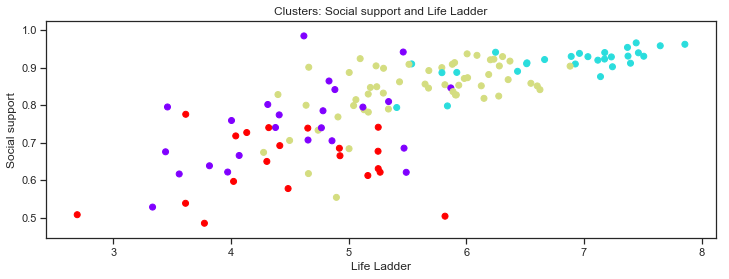

In [32]:
plt.rcParams["figure.figsize"] = (12,4)
plt.scatter(clusters['Life Ladder'],clusters['Social support'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel("Life Ladder")
plt.ylabel('Social support')
plt.title("Clusters: Social support and Life Ladder");

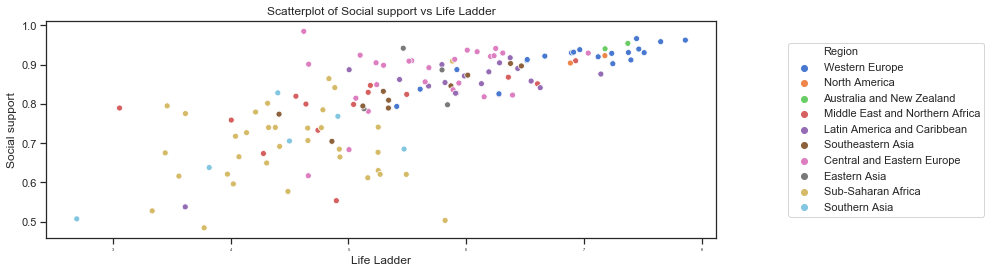

In [33]:
plt.rcParams["figure.figsize"] = (12,4)
plt.rcParams["xtick.labelsize"] = 4
g =sns.scatterplot(y = dfh['Social support'],x= dfh['Life Ladder'],hue=dfh['Region'])
# https://stackoverflow.com/q/53733755 to move legends outside of box
g.legend(loc='center left', bbox_to_anchor=(1.10, 0.5), ncol=1);
plt.title("Scatterplot of Social support vs Life Ladder");

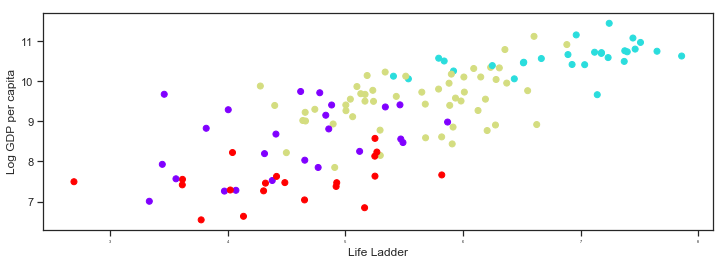

In [34]:
plt.scatter(clusters['Life Ladder'],clusters['Log GDP per capita'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel("Life Ladder")
plt.ylabel('Log GDP per capita');

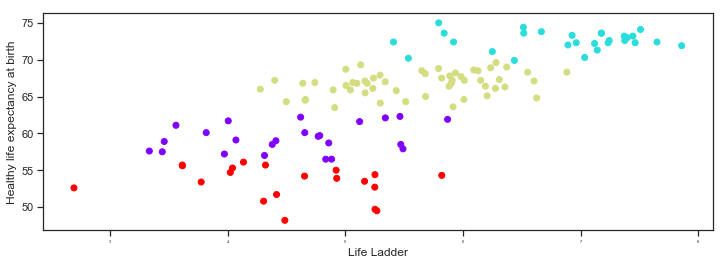

In [35]:
plt.scatter(clusters['Life Ladder'],clusters['Healthy life expectancy at birth'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel("Life Ladder")
plt.ylabel('Healthy life expectancy at birth');

In [36]:
#f,axes=plt.subplots(2,2, figsize=(10,10))

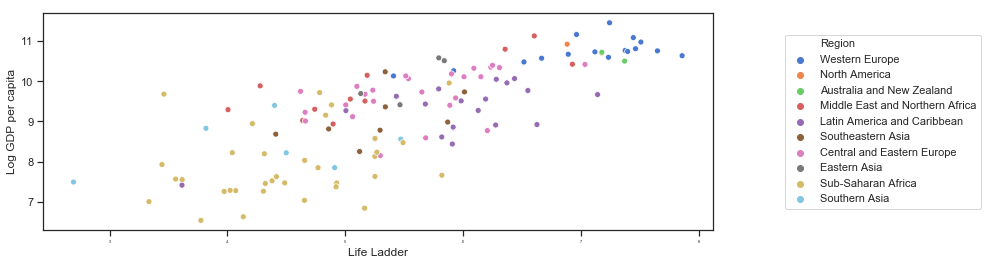

In [37]:
g =sns.scatterplot(y = dfh['Log GDP per capita'],x= dfh['Life Ladder'],hue=dfh['Region'])
# https://stackoverflow.com/q/53733755 to move legends outside of box
g.legend(loc='center left', bbox_to_anchor=(1.10, 0.5), ncol=1);

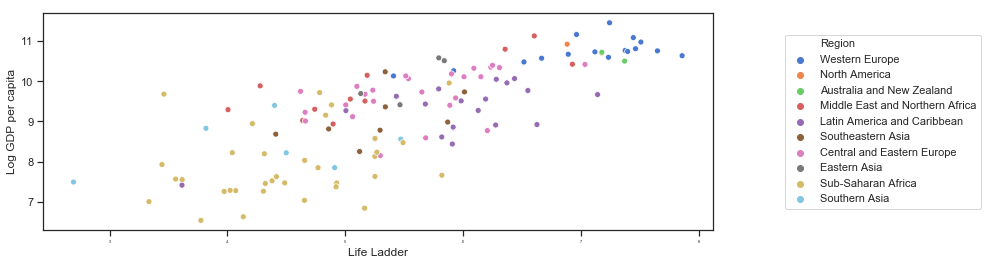

In [38]:
g =sns.scatterplot(y = dfh['Log GDP per capita'],x= dfh['Life Ladder'],hue=dfh['Region'])
# https://stackoverflow.com/q/53733755 to move legends outside of box
g.legend(loc='center left', bbox_to_anchor=(1.10, 0.5), ncol=1);

#### ratio of sample mean to sample standard deviation:

In [39]:
df.iloc[:,4:7].mean()/df.iloc[:,4:7].std()

Log GDP per capita                  7.777455
Social support                      6.799491
Healthy life expectancy at birth    8.322140
dtype: float64

### Correlation in the data:
look at the correlation and covariance of the variables, including the RegionCode.

In [40]:
dfh.corr()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,RegionCode
Life Ladder,1.000000,0.760206,0.719267,0.744264,0.222740
Log GDP per capita,0.760206,1.000000,0.792945,0.852848,0.364472
Social support,0.719267,0.792945,1.000000,0.751514,0.225778
Healthy life expectancy at birth,0.744264,0.852848,0.751514,1.000000,0.409142
RegionCode,0.222740,0.364472,0.225778,0.409142,1.000000


Life satisfactions are positively correlated with income levels (Log GDP per capita), social support and healthy life expectancy. Income and life expectancy are very highly correlated.


I might be interpreting the correlations incorrectly using the region codes. What I wanted to see was if the region did affect the variables.

# come back to here!

***
# Simulate some data

- Regions and Countries

- Life Ladder 

- Log GDP per capita

- Social Support

- Healthy Life Expectancy at birth

- Freedom

There are several things to consider when simulating data here.
First countries and regions: I cannot make up as such new countries and geographic regions. Therefore I will just create a list of countries by appending a number to 'Country' or something like that!
There are relationships between variables and therefore this must follow through to the simulate dataset. This will pose a bit of a challenge!
I will have to create a new dataframe to hold the simulated data.

If country is in a particular region it is more like to have certain traits than if it is in another geogrpahic region.


    if country in region 1:
    x.append(np.random()
    elif country in region 2:
    x.append(np.random()
    



***
## Simulate Regions and countries.

There are 10 regions in the sample dataset. I need to see the distribution of countries across the regions. How many countries there are in each geographic region. There are different ranges of values depending on geographic region the countries are in.
Therefore I may need to use different distributions to generate.

if country is in region 1:
    income = np.random(with mean and standard deviation)
elif country region == 'different region':
    income  = np.random...


In [41]:
# temporary change the number of rows to be displayed.
pd.options.display.max_rows=40 # set options to display max number of rows
# see how many countries in each Region
dfh.Region.value_counts()
# find how many values in total
print(f"There are {len(dfh.Region)} countries in the dataset. ")
# calculate the proportion of countries in each region
prob=(dfh.Region.value_counts()/len(dfh.Region)).round(3)
print(f"These countries are split over 10 geographic regions as follows: \n{df18.Region.value_counts()/len(df18.Region)}.3f %", sep="\n")
# mnake sure they sum to 1. 
prob.sum()

There are 136 countries in the dataset. 
These countries are split over 10 geographic regions as follows: 
Sub-Saharan Africa                 0.250000
Central and Eastern Europe         0.191176
Western Europe                     0.147059
Latin America and Caribbean        0.132353
Middle East and Northern Africa    0.102941
Southeastern Asia                  0.073529
Southern Asia                      0.044118
Eastern Asia                       0.029412
Australia and New Zealand          0.014706
North America                      0.014706
Name: Region, dtype: float64.3f %


1.0

The dataset contains 136 countries over 10 geographic regions.

Here I plot the distribution of countries in the real dataset over the 10 regions. 
To avoid the axes labels overlapping, I have followed advice on [drawing from data](https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib) to rotate the axes labels.
Also to show the plot by descending order of the region with the most countries.

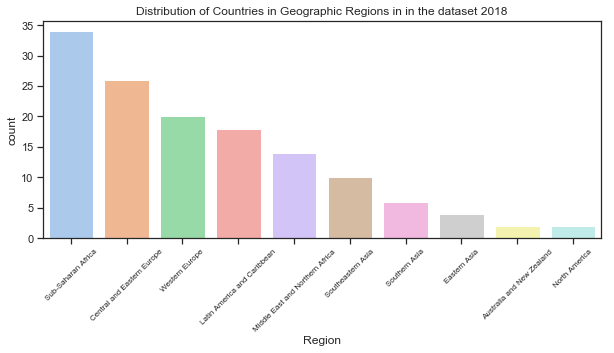

In [42]:
plt.rcParams["figure.figsize"] = (10,4)
plt.rcParams["xtick.labelsize"] = 8

sns.set_palette("pastel")
# https://stackoverflow.com/q/46623583 order countplot by count.
chart= sns.countplot(dfh.Region, order= dfh['Region'].value_counts().index)
# rotate axes labels to avoid overlap - see <https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib>
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("Distribution of Countries in Geographic Regions in in the dataset 2018");


#### Simulate some geographic regions.
Use [`numpy.random.choice`](https://numpy.org/doc/1.16/reference/generated/numpy.random.choice.html#numpy-random-choice) function to generates a random sample of regions from a one dimensional array of made-up regions using the proportions from the real dataset. 

In [43]:
# makeup region names:
Makeup_regions = ['Region_1','Region_2','Region_3','Region_4','Region_5','Region_6','Region_7','Region_8','Region_9','Region_10']
# assign countries to region based on proportions in actual dataset.
CR= np.random.choice(Makeup_regions, 136, p=[0.25,0.191,0.147,0.132,0.103,0.074,0.044,0.029,0.015,0.015])
len(CR)
CR

array(['Region_2', 'Region_5', 'Region_2', ..., 'Region_1', 'Region_1',
       'Region_5'], dtype='<U9')

#### Make up some country names:
Here I am just going to create some country names by appending a digit to the string 'Sim_Country_'. I don't have the imagination to start creating 139 new countries!

In [44]:
# create a list of countries by appending number to 'country'
countries =[]

for i in range(136):
    countryname = 'Sim_Country_'+str(i)
    countries.append(countryname)
    
len(countries)

136

## Create a dataframe to hold the simulated data:
I now have countries and regions for the simulated dataset which I will add to a dataframe.

In [45]:
pd.set_option('max_rows', 8)
# create a dataframe to hold the simulated variables.
sim_df = pd.DataFrame(data={'Sim_Country':countries, 'Sim_Region':CR})
sim_df

,Sim_Country,Sim_Region
0,Sim_Country_0,Region_2
1,Sim_Country_1,Region_5
2,Sim_Country_2,Region_2
3,Sim_Country_3,Region_2
...,...,...
132,Sim_Country_132,Region_2
133,Sim_Country_133,Region_1
134,Sim_Country_134,Region_1
135,Sim_Country_135,Region_5


Here is a countplot showing the distribution of countries across the 10 simulated regions in the same proportion as in the actual dataset for 2018.

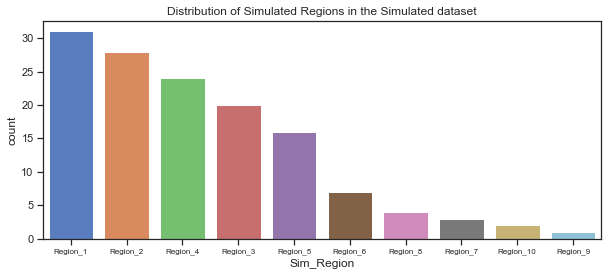

In [46]:
# set the figure size
plt.rcParams["figure.figsize"] = (10,4)
sns.set_palette("muted")
# countplot of simulated region, order by counts
sns.countplot(sim_df.Sim_Region, order= sim_df['Sim_Region'].value_counts().index)
# add title
plt.title("Distribution of Simulated Regions in the Simulated dataset");

The countplot above shows the simulated regions in  the simulated dataset, ordered by the count of the countries in each region. Comparing it to the actual dataset shows that the split looks good.

***
## Simulate Life Ladder:


I am now looking at the Life Ladder variable.
The underlying source of the happiness scores in the [World Happiness Reports](https://worldhappiness.report/faq/) is the Gallup World Poll:

The underlying source of the happiness scores and the happiness rankings in the World Happiness Report is the Gallup World Poll.

>The rankings are based on answers to the main life evaluation question asked in the poll. This is called the Cantril ladder: it asks respondents to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. The rankings are from nationally representative samples, for the years 2016-2018. They are based entirely on the survey scores, using the Gallup weights to make the estimates representative. 

The sub-bars show the estimated extent to which each of six factors - levels of GDP, life expectancy, generosity, social support, freedom, and corruption - contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors (see FAQs: What is Dystopia?). The sub-bars have no impact on the total score reported for each country, but instead are just a way of explaining for each country the implications of the model estimated in Table 2.1. People often ask why some countries rank higher than others - the sub-bars (including the residuals, which show what is not explained) are an attempt to provide an answer to that question.

The report itself looks at life evaluations for the 2016 to 2018 period and the rankings across all countries in the study. They look at the 6 key variables and how they contribute to the scores. 
Each country's happiness score is not calculated based on the 6 factors but instead the researchers used the 6 variables to explain the variation of happiness across countries. 

In [47]:
# look at the data again
dfh.iloc[:,0:7].head()

,Country name,Region,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,RegionCode
7,Switzerland,Western Europe,7.508587,10.975945,0.930291,74.099998,3
26,Denmark,Western Europe,7.648786,10.755594,0.958219,72.400002,3
34,Norway,Western Europe,7.444262,11.085626,0.965962,73.199997,3
47,Canada,North America,7.175497,10.701248,0.922719,73.599998,10
58,Finland,Western Europe,7.858107,10.636060,0.962155,71.900002,3


#### Descriptive statistics of the Life Ladder variable in the dataset for 2018:

In [48]:
dfh['Life Ladder'].describe()

count    136.000000
mean       5.502134
std        1.103461
min        2.694303
25%        4.721326
50%        5.468088
75%        6.277691
max        7.858107
Name: Life Ladder, dtype: float64

#### Plot of the distribution of Life Ladder for 2018:

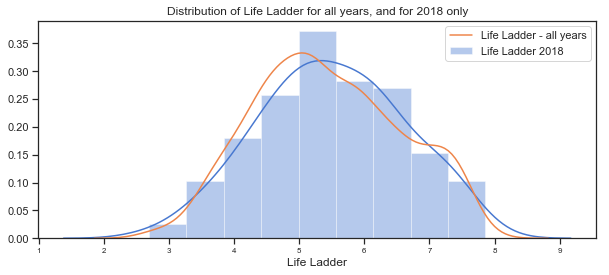

In [49]:
# distribution of the Life Ladder for 2018
sns.distplot(dfh['Life Ladder'], label="Life Ladder 2018")
# kdeplot of the life ladder for all years in the extended dataset (WHR Table2.1)
sns.kdeplot(df['Life Ladder'], label="Life Ladder - all years")

plt.title("Distribution of Life Ladder for all years, and for 2018 only")
plt.legend();

From the distribution plot of the 2018 life ladder variable, it does appear to be normally distributed.
There are some [tests for normality](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/) in a blogpost at <machinelearningmastery.com>. I will use these tests to check if the data is indeed normal.

The blogpost outlines how it is important when working with a sample of data to know whether to use parametric or nonparametric statistical methods. If methods used assume a Gaussian distribution when it is not the case then findings can be incorrect or misleading. In some cases it is enough to assume the data is normal enough to use parametric methods or to transform the data to be normal enough. 

>Parametric statistical methods assume that the data has a known and specific distribution, often a Gaussian distribution. If a data sample is not Gaussian, then the assumptions of parametric statistical tests are violated and nonparametric statistical methods must be used.

Normality tests can be used to check if your data sample is from a Gaussian distribution or not.
- Statistical tests calculate statistics on the data to quantify how likely it is that the data was drawn from a normal distribution.
- Graphical methods plot the data to qualitatively evaluate if the data looks Gaussian.

References: <https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/>
<https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/>
Tests for normality include the Shapiro_Wilk Normality Test, the D'Agostino and Pearson's Test, the Anderson-Darling Test.

A histogram of the data is the first step in seeing if the data looks normal. This plots the distribution of the sample of data. A normal distribution has a characteristic bell-shape.


A sample of data has a Gaussian distribution of the histogram plot, showing the familiar bell shape.
The histogram of the Life Ladder variable does appear to be gaussian or approximately normal.

A **Quantile-Quantile Plot** also known as the QQ plot 

This can be used for checking the distribution of a data sample is the quantile-quantile plot, Q-Q plot, or QQ plot for short. This plots generates its own sample of the idealised distribution that you want to compare your sample of data to. The idealised samples are divided into groups and each data point in the sample is paired with a similar member from the idealised distribution at the same cumulative distribution.

A scatterplot is drawn with the idealised values on the x-axis and the data sample on the y-axis.
The resulting points are plotted as a scatter plot with the idealized value on the x-axis and the data sample on the y-axis. If the result is a straight line of dots on the diagonal from the bottom left to the top right this indicates a perfect match for the distribution whereas if the dots deviate far from the diagonal line.


#### QQ plot of Life Ladder:
Here a QQ plot is created for the Life Ladder sample compared to a Gaussian distribution (the default).

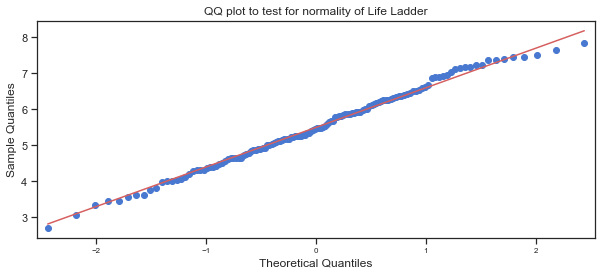

In [50]:
# QQ Plot of Life Ladder
# import the qqplot function 
from statsmodels.graphics.gofplots import qqplot
# Life Ladder observations from the dataset
data = dfh['Life Ladder']
# plot a q-q plot, draw the standardised line
qqplot(data, line='s') 
plt.title("QQ plot to test for normality of Life Ladder")
plt.show()

#### Tests for normality:
The QQ plot does seem to indicate to me  that the Life Ladder is normally distributed. The scatter plots of points do mostly follow the diagonal pattern for a sample from a Gaussian distribution.

Here I will use some of the normality tests as outlined on the [blogpost on tests for normality](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/).
These tests assume the sample was drawn from a Gaussian distribution and test this as the null hypothesis. A test-statistic is calculated and a p-value to interpret the test statistic. A threshold level called *alpha* is used to interpret the test. This is typically 0.05.
If the p-value is less than or equal to alpha, then reject the null hypothesis. If the p-value is greater than alpha then fail to reject the null hypothesis.
In general a larger p-value indicates that the sample was likely to have been drawn from a Gaussian distribution. A result above 5% doesn't mean the null hypothesis is true but that it is very likely true given the evidence available.



#### Shapiro-Wilk Normality Test

In [51]:
# adapted from https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
# import the shapiro test from scipy stats
from scipy.stats import shapiro
# calculate the test statistic and the p-value to interpret the test on the Life Ladder sample
stat, p = shapiro(dfh['Life Ladder'])
# interpret the test
alpha= 0.05
print('stat=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('The sample of Life Ladder looks Gaussian (fail to reject H0)')
else:
    print('The sample of Life Ladder does not look Gaussian (reject H0)')

stat=0.991, p=0.520
The sample of Life Ladder looks Gaussian (fail to reject H0)


#### D’Agostino’s K^2 Test
This test calculates the kurtosis and skewness of the data to see if the data distribution is not normal like.
The skew is a measure of asymmetry in the data while hurtosis how much of the distribution is in the tails.


In [52]:
# D'Agostino and Pearson's Test adapted from https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
# import from scipy.stats
from scipy.stats import normaltest
# normality test
stat, p = normaltest(dfh['Life Ladder'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('The sample of Life Ladder looks Gaussian (fail to reject H0)')
else:
    print('The sample of Life Ladder does not look Gaussian (reject H0)')


Statistics=2.435, p=0.296
The sample of Life Ladder looks Gaussian (fail to reject H0)


#### Anderson-Darling Test:

This is a statistical test that can be used to evaluate whether a data sample comes from one of among many known data samples adn can be used to check whether a data sample is normal. The test is a modified version of the [Kolmogorov-Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov–Smirnov_test) which is a nonparametric goodness-of-fit statistical test.

The Anderson-Darling test returns a list of critical values rather than a single p-value. The test will check against the Gaussian distribution (dist=’norm’) by default.


In [53]:
# Anderson-Darling Test - adapted from https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

from scipy.stats import anderson
# normality test
result = anderson(dfh['Life Ladder'])
print('Statistic: %.3f' % result.statistic)
p = 0
# checking for a range of critical values
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        # fail to reject the null that the data is normal if test statistic is less than the critical value.
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        # reject the null that the data is normal if test statistic is greater than the critical value.
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.235
15.000: 0.560, data looks normal (fail to reject H0)
10.000: 0.638, data looks normal (fail to reject H0)
5.000: 0.766, data looks normal (fail to reject H0)
2.500: 0.893, data looks normal (fail to reject H0)
1.000: 1.062, data looks normal (fail to reject H0)


The sample of Life Ladder for 2018 does appear to be normally distributed based on the above tests.
Therefore I can go ahead and simulate data for this variable using the normal distribution using the sample mean and standard deviation statistics.


#### Simulate Life ladder variable:

I will now simulate 'Life Ladder' using the [`numpy.random.normal`](https://numpy.org/doc/1.16/reference/generated/numpy.random.normal.html#numpy-random-normal) function. This takes 3 arguments - `loc` for the mean or centre of the distributon, `scale` for the spread or width of the distribution - the standard deviation, and `size` for the number of samples to draw from the distribution.

In [54]:
print(f" The mean of the sample dataset for 2018 is {df18['Life Ladder'].mean()} ")
print(f" The standard deviation of the sample dataset for 2018 is {df18['Life Ladder'].std()} ")
dfh.shape

 The mean of the sample dataset for 2018 is 5.502134340650895 
 The standard deviation of the sample dataset for 2018 is 1.1034612436939353 


(136, 7)

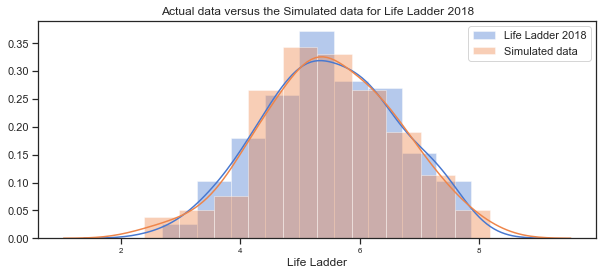

In [55]:
# simulate data based on statistics from the 2018 sample dataset
# simulate life ladder using sample mean and standard deviation
x= np.random.normal(dfh['Life Ladder'].mean(),dfh['Life Ladder'].std(),136)
# plot the distribution of the actual dataset
sns.distplot(dfh['Life Ladder'], label="Life Ladder 2018")
# plot the simulated data 
sns.distplot(x, label="Simulated data")
plt.title("Actual data versus the Simulated data for Life Ladder 2018")
plt.legend();

#### Comparing the simulated sample to the actual sample from the 2018 dataset:
Looking at the single sample above

In [56]:
# print the mean, min, max and standard deviation of the simulated data to compare it with the real data.
print("Samples from the simulation")
print(f"mean: {np.mean(x)}")
print(f" min :{np.min(x)}")
print(f" max: {np.max(x)}")
print(f"standard deviation:{np.std(x)}")
print(f"{len(x)}")

Samples from the simulation
mean: 5.500192031575379
 min :2.394951948228991
 max: 8.18225562142068
standard deviation:1.134460698492242
136


#### Using the t-test to check if the actual sample and simulated sample are statistically different:

[machinelearningmastery](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/) again has another blog post on statistical tests that can be used to compare samples of data.
Students T-test can be used to check whether the means of two independent samples are significantly different.

In [57]:
# import Student's t-test from scipy.stats module
from scipy.stats import ttest_ind
# calculate the t-stat and the p-value
stat, p = ttest_ind(x, df18['Life Ladder'])
print('stat=%.3f, p=%.3f' % (stat, p))
# if the p-value is greater than alpha, do not reject the null hypothesis.
if p > 0.05:
    print('Probably the same distribution')
# if the p-value is less than 0.05 reject the null hypothesis.
else:
    print('Probably different distributions')

stat=-0.014, p=0.989
Probably the same distribution


The t-test above was used to compare the simulated sample with the actual sample and showed that the difference of the mean of the two samples was not statistically significant.

#### Simulate using np.random.normal to generate many samples:

Here I use a for loop to run a number of different simulation using the mean and standard deviation from my dataset for 2018. As the random seed has not been set, we would expect to see slightly different distributions each time. All of the plotted histograms show a normal shape.

I have created 20 lists of 136 samples here. 

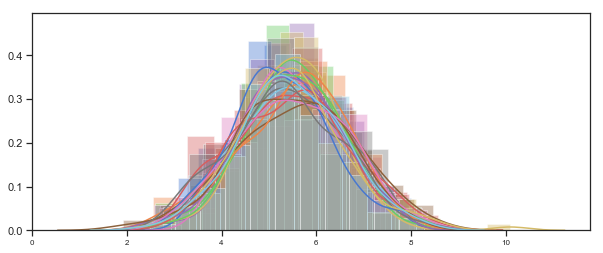

In [58]:
# loop through and plot a  number of simulations:
LifeSimulations=[]
for i in range(20):
    # using mean and standard deviation from the sample dataset
        Life_sim= np.random.normal(df18['Life Ladder'].mean(),df18['Life Ladder'].std(),136)
        # plot the distributions of the simulated data
        sns.distplot(Life_sim)
        LifeSimulations.append(Life_sim)
        


#### Compare the multiple simulated samples to the actual data:


In [59]:
LifeSimulations

[array([5.5506, 5.7999, 6.589 , ..., 5.3211, 5.2694, 6.4981]),
 array([5.7942, 4.8702, 5.6649, ..., 6.4498, 6.5509, 3.0972]),
 array([3.9096, 6.163 , 5.6641, ..., 8.2395, 5.2397, 6.0592]),
 array([6.4852, 5.2204, 6.2253, ..., 6.1531, 4.5421, 5.1639]),
 array([6.2796, 5.0866, 7.765 , ..., 5.8885, 5.2662, 5.5053]),
 array([5.4527, 6.2204, 6.0893, ..., 6.6717, 6.6647, 5.8603]),
 array([4.6432, 4.1768, 5.2187, ..., 4.537 , 4.1231, 5.2235]),
 array([5.3615, 4.9239, 6.0908, ..., 4.405 , 7.3139, 5.8627]),
 array([4.9758, 5.2839, 6.8088, ..., 4.2025, 6.255 , 6.1355]),
 array([3.8301, 5.0291, 6.2278, ..., 5.3587, 4.8222, 4.4885]),
 array([4.6558, 6.164 , 5.6911, ..., 3.0781, 5.7163, 5.4613]),
 array([5.8462, 4.6551, 4.9258, ..., 5.4987, 5.8394, 6.1844]),
 array([5.6573, 5.0234, 6.6245, ..., 5.971 , 7.7683, 4.8083]),
 array([5.4799, 5.3465, 6.6671, ..., 5.6527, 4.0499, 7.2473]),
 array([4.4279, 5.1034, 4.9047, ..., 4.5136, 5.758 , 5.6316]),
 array([4.9378, 5.0264, 4.3513, ..., 2.7522, 6.2417, 3.

In [60]:
## print the mean, min, max and standard deviation of the simulated data to compare it with the real data.
print("Samples from the simulation")
print(f"mean: {np.mean(LifeSimulations)}")
print(f" min :{np.min(LifeSimulations)}")
print(f" max: {np.max(LifeSimulations)}")
print(f"standard deviation:{np.std(LifeSimulations)}")
print(f"{len(Life_sim)}")

Samples from the simulation
mean: 5.478460102369537
 min :1.9085679053922986
 max: 10.097461296375947
standard deviation:1.0876964502957474
136


In [61]:
# import Student's t-test from scipy.stats module
from scipy.stats import ttest_ind
# calculate the t-stat and the p-value of one of the simulated arrays
stat, p = ttest_ind(LifeSimulations[0], df18['Life Ladder'])
print('stat=%.3f, p=%.3f' % (stat, p))
# if the p-value is greater than alpha, do not reject the null hypothesis.
if p > 0.05:
    print('Probably the same distribution')
# if the p-value is less than 0.05 reject the null hypothesis.
else:
    print('Probably different distributions')

stat=-0.328, p=0.743
Probably the same distribution


## Note! come back to this.
Now that I have simulated data for the Life Ladder variable I need to add it to the dataframe. One problem I see here is that if I am trying to replicate the split of countries into regions as in the actual dataset then I cannot just simply add in the life ladder simulated data. For now I am just going to add the simulated data to the dataframe.
I could look at simulating data for smaller regional distributions rather than based on the full sample.
I will probably look to splitting the data into a smaller number of regions.

In [62]:
print(sim_df.shape)
sim_df.head()
sim_df['Sim_Life_Ladder'] = x
sim_df.head()

(136, 2)


,Sim_Country,Sim_Region,Sim_Life_Ladder
0,Sim_Country_0,Region_2,6.002861
1,Sim_Country_1,Region_5,6.301393
2,Sim_Country_2,Region_2,6.859323
3,Sim_Country_3,Region_2,5.434144
4,Sim_Country_4,Region_1,5.175888


In [63]:

sim_df.describe()

,Sim_Life_Ladder
count,136.000000
mean,5.500192
std,1.138655
min,2.394952
25%,4.734419
50%,5.493760
75%,6.303974
max,8.182256


***
## Simulating Social Support



## Social Support:
Next I will look at simulating data for the Social support variable. First I look at the summary statistics and then at the plots to see the type of distribution it could be from.

The variable 'Social support' was the result of a question in the Gallop World Poll with the national average of the binary responses for each country to the GWP question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”

The distribution from the dataset shows that it is left skewed. The scatterplots above showed that it is positively correlated with life satisfaction, income levels and healthy life expectancy.
The boxplots below show that the median values fall into roughly 3 groups by regions with Western Europe, North America and Australia and New Zealand having the highest scores,  while Southern Asia and Sub Saharan Africa have the lowest median scores and a wider spread. There are more countries though in the 

In [64]:
# look at the correlation between social support and the other variables.
dfh.corr()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,RegionCode
Life Ladder,1.000000,0.760206,0.719267,0.744264,0.222740
Log GDP per capita,0.760206,1.000000,0.792945,0.852848,0.364472
Social support,0.719267,0.792945,1.000000,0.751514,0.225778
Healthy life expectancy at birth,0.744264,0.852848,0.751514,1.000000,0.409142
RegionCode,0.222740,0.364472,0.225778,0.409142,1.000000


### Social support variable at global level:

In [65]:
dfh['Social support'].describe()

count    136.000000
mean       0.810544
std        0.116332
min        0.484715
25%        0.739719
50%        0.836641
75%        0.905608
max        0.984489
Name: Social support, dtype: float64

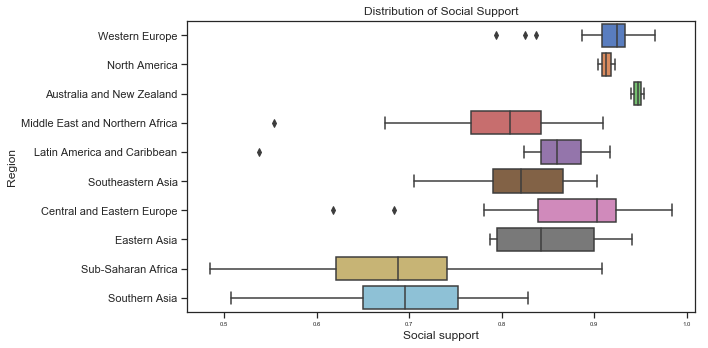

In [66]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["xtick.labelsize"] = 6
sns.boxplot(y="Region", x="Social support", data=dfh);
plt.title("Distribution of Social Support")
plt.tight_layout()
plt.show()

### Social Support statistics from the 2018 dataset by region / region code

In [67]:
dfh['Social support'].groupby(dfh['Region']).describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Australia and New Zealand,2.0,0.947000,0.009705,0.940137,0.943569,0.947000,0.950431,0.953863
Central and Eastern Europe,26.0,0.872249,0.081660,0.617219,0.839146,0.902753,0.923485,0.984489
Eastern Asia,4.0,0.853319,0.073675,0.787605,0.795194,0.842078,0.900202,0.941514
Latin America and Caribbean,18.0,0.847512,0.082015,0.537976,0.842156,0.860028,0.885538,0.917316
...,...,...,...,...,...,...,...,...
Southeastern Asia,10.0,0.822206,0.060913,0.704738,0.790708,0.820662,0.866240,0.902841
Southern Asia,6.0,0.688764,0.110865,0.507516,0.649804,0.695308,0.752641,0.828065
Sub-Saharan Africa,34.0,0.691773,0.098609,0.484715,0.620988,0.688330,0.740679,0.908842
Western Europe,20.0,0.911804,0.045065,0.793501,0.908284,0.924973,0.933122,0.965962


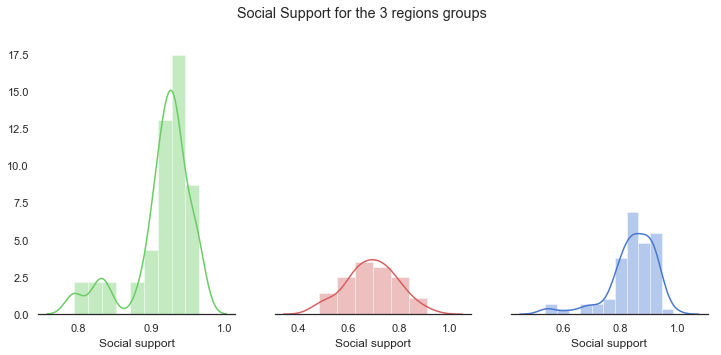

In [68]:
# set up the matploptlib figure, 
# https://seaborn.pydata.org/examples/distplot_options.html?highlight=tight_layout#distribution-plot-options
sns.set(style="white", palette="muted", color_codes=True)

f, axes=plt.subplots(1,3, figsize=(12,5), sharey=True)
sns.despine(left=True)
sns.distplot(dfh.loc[dfh.loc[:,'Region'].isin(['Western Europe','Australia and New Zealand','North America'])]['Social support'], ax=axes[0], label="WesternEurope", color="g")

sns.distplot(dfh.loc[dfh.loc[:,'Region'].isin(['Sub-Saharan Africa','Southern Asia'])]['Social support'], ax=axes[1], label="Sub-Saharan Africa", color="r")

sns.distplot(dfh.loc[dfh.loc[:,'Region'].isin(['Eastern Asia','Southeastern Asia','Middle East and Northern Africa','Latin America and Caribbean','Central and Eastern Europe'])]['Social support'], ax=axes[2], label="Middle", color="b")

plt.suptitle("Social Support for the 3 regions groups");

#plt.setp(axes, yticks=[])
#sns.distplot(dfh.loc[dfh.loc[:,'Region'].isin(['Latin America and Caribbean'])]['Social support'], ax=axes[1,2])

When broken down by region, the distribution for the poorer regions including Sub Saharan Africa and South Asia are actually normally distributed. The other regions have some outliers where some of the countries have very low scores.
 
I think the best way overall here is to use sampling with replacement from an array of possible values based on the underlying dataset.


Social support is broken down by 3 main region groups above. This will not be an easy one to simulate using a distribution function but samplimg with replacement or a form of bootstrapping will work here. 
Must add social to the simulated dataframe.
Need to consider the correlations with other variables.
I guess I could work out the proportions from one column and apply to another but maybe this is not right to do!


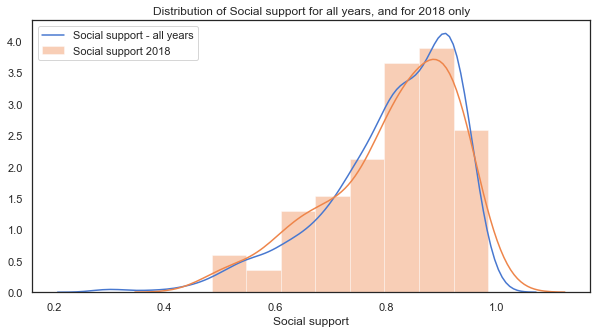

In [69]:
# plot all the data availabe
sns.kdeplot(df['Social support'].dropna(), label="Social support - all years")
# plot the data for social support for 2018.
sns.distplot(dfh['Social support'], label="Social support 2018")
plt.title("Distribution of Social support for all years, and for 2018 only")
plt.legend();

### Testing for normality

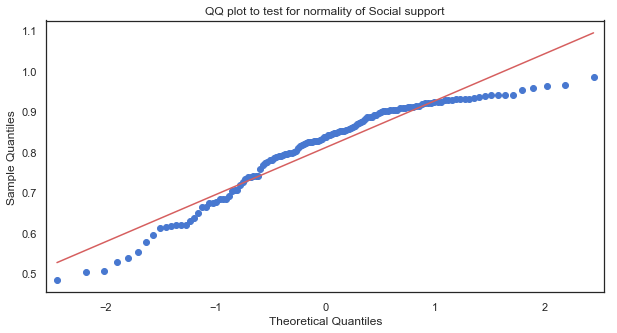

In [70]:
# QQ Plot of Social support
# import the qqplot function 
from statsmodels.graphics.gofplots import qqplot
# Life Ladder observations from the dataset
data = dfh['Social support']
# plot a q-q plot, draw the standardised line
qqplot(data, line='s') 
plt.title("QQ plot to test for normality of Social support")
plt.show()

The histograms and QQ plots show that the Social support variable does not follow a normal distribution like Life Ladder did. I will just do one test to validate this. The histogram shows a left skewed distribution.

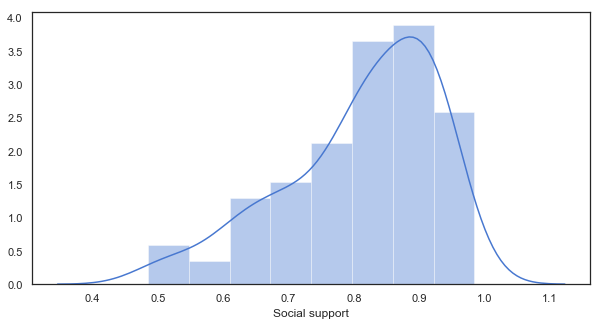

In [71]:
sns.distplot(dfh['Social support'], label="Social support 2018");


I can either break up the data into regional subsamples or use the resampling method.


The distribution of the sample of Social support values does not look to be normally distributed and the test for normality shows that the data is not normally distributed. There are ways of transforming variable to make them normally distributed. Alternatively nonparametric statistical methods can be used instead of parametric methods.

I will try using the bootstrap resampling method which is a non-parametric way of simulating data using resampling or sampling with replacement. 

>Bootstrapping is the practice of estimating properties of an estimator (such as its variance) by measuring those properties when sampling from an approximating distribution. One standard choice for an approximating distribution is the empirical distribution function of the observed data. In the case where a set of observations can be assumed to be from an independent and identically distributed population, this can be implemented by constructing a number of resamples with replacement, of the observed dataset (and of equal size to the observed dataset). 
The basic idea of bootstrapping is that inference about a population from sample data can be modelled by resampling the sample data and performing inference about a sample from resampled data. As the population is unknown, the true error in a sample statistic against its population value is unknown. In bootstrap-resamples, the 'population' is in fact the sample, and this is known; hence the quality of inference of the 'true' sample from resampled data (resampled → sample) is measurable.
[Wikipedia wiki on Bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics))


Bootstrapping is a statistical technique for estimating quantities about a population by averaging estimates from multiple small data samples. Samples are constructed by drawing observations from a large data sample one at a time and then returning the observation so that it could be drawn again. Therefore any given observation could be included in the sample more than once while some observations might never be drawn. 

Again [machinelearningmastery.com](https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/) has a blog post on this and outlines the steps:

The process for building one sample is:
- choose the size of the sample
- While the size of the sample is less than the chosen size
    1. Randomly select an observation from the dataset
    2. Add it to the sample
The number of repetitions must be large enough that meaningful repetitions can be calculated on the sample.


Based on the information I will attempt to use sampling with replacement or bootstrapping to simulate the Social support variable.
Here I will use the sample size the same as the original dataset which is 136 observations. [numpy.random.choice](https://numpy.org/doc/1.16/reference/generated/numpy.random.choice.html#numpy-random-choice) function can be used for this purpose.

The mean of the Social support variable in the dataset can be considered as a single estimate of the mean of the population of social support while the standard deviation is an estimate of the variability.

The simplest bootstrap method would involve taking the original data set of N(136) Social support values and sampling from it to form a new sample  - the 'resample' or bootstrap sample that is also of size 136. 
If the bootstrap sample is formed using sampling with replacement from the original data sample withb a large enough size then there should be very little chance that the bootstrap sample will be the exact same as the original sample. This process is repeated many times (thousands) and the mean  computed for each bootstrap sample to get the bootstrap estimates which can then be plotted on a histogram which is considered an estimate of the shape of the distribution.

In [72]:
len(dfh['Social support'])

136

### Simulate Social support using resampling / bootstrap method.

The [Machinelearningmastery.com blogpost on bootstrap](https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/) outlines how to implement the bootstrap method using the[scikit-learn resample function](http://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html) which takes as arguments the data array, whether or not to sample with replacement, the size of the sample, and the seed for the pseudorandom number generator used prior to the sampling.
I will apply this method below to the Social support variable and plot the results. I will also just use the `numpy.random.choice` function and see how they compare.

https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60

In [73]:
# adapted from https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/
# import resample function
from sklearn.utils import resample
# provide Social support data to the function
data=dfh['Social support']
# specify using replacement, set the size of the sample
boot = resample(data, replace=True, n_samples=136, random_state=1)
print('Bootstrap Sample: %s' % boot)
# gather the out of bag observations
oob = [x for x in data if x not in boot]
#print('OOB Sample: %s' % oob)


Bootstrap Sample: 487     0.922379
933     0.817930
1671    0.684800
1010    0.738480
          ...   
1093    0.829381
610     0.940971
1486    0.621303
859     0.781230
Name: Social support, Length: 136, dtype: float64


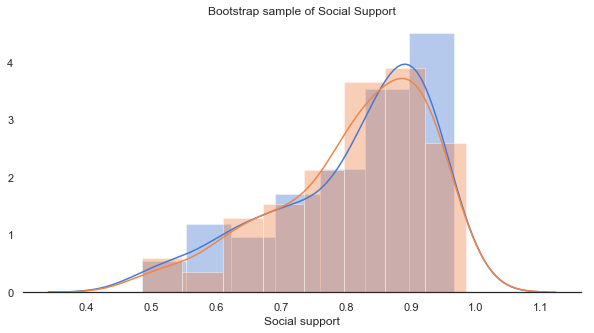

In [74]:
# plot the distribution of the bootstrapped sample, add title, labels etc
sns.distplot(boot, label="bootstrapped sample");
sns.despine(left=True)
plt.title("Bootstrap sample of Social Support");
sns.distplot(dfh['Social support'], label="Social support 2018");


In [75]:
print(f" The mean of the Social support sample dataset for 2018 is {dfh['Social support'].mean()} ")
print(f" The standard deviation is {dfh['Social support'].std()} ")
dfh.shape

 The mean of the Social support sample dataset for 2018 is 0.8105441362542265 
 The standard deviation is 0.11633213261117184 


(136, 7)

### Sampling with replacement using np.random.choice:
Here I use a loop to draw multiple random samples with replacements from the dataset. 

Additionally the means for each sample can be calculated and then all the means from the different samples are plotted to show their distribution.
A bootstrapped mean and confidence interval is then calculated. 
This is not really what I need here. This is estimating a quantity such as the mean of the population.


I am following this [blogpost on bootstrap method](https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60) here:

In [76]:
# using the Social support data from the dataset.
social=dfh['Social support']
# create sample by resampling from social
sample = np.random.choice(social, size=30)
sample

# bootstrap for mean
boot_means = []
for _ in range(10000):
    bootsample = np.random.choice(sample,size=30, replace=True)
    boot_means.append(bootsample.mean())
    
# simulated mean of mean
bootmean = np.mean(boot_means)

# simulated standard deviation of mean
bootmean_std = np.std(boot_means)

# simulated mean VS true mean
print(social.mean(), bootmean)

# the theorical standard error and simulated standard error
print(social.std()/(30 ** 0.5), bootmean_std)

0.8105441362542265 0.8255261033763487
0.021239244397940393 0.020300961595686843


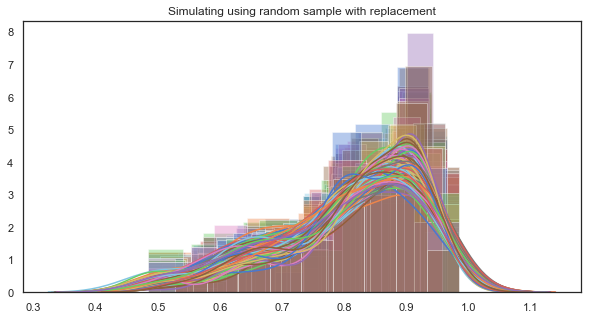

In [77]:
# using the Social support data from the dataset.
social=dfh['Social support']
# create a list to store the means of the samples, set the number of simulations
mean_social_sim, sims = [], 136
# use loop to create 100 samples - takes very long to do 1000 
for _ in range(sims):
    # draw a random sample from social with replacement and store it in social_sample
    boot_sample=np.random.choice(social, replace=True, size=len(social))

    # plot the distribution of each sample
    sns.distplot(boot_sample)
    # add title
    plt.title("Simulating using random sample with replacement")
    boot_mean = np.mean(boot_sample)
    # append the mean of each sample to mean_social
    mean_social_sim.append(boot_mean)    

The main use of the bootstrap is making inferences about an estimate for a population parameter on sample data. 
For the purposes of this project I just need to simulate a single dataset. However by calculating the bootstrap means and comparing them to the dataset I am attempting to replicate shows that it is a suitable method here when the data does not follow a particular distribution. 

In [78]:
dfh['Social support'].describe()

count    136.000000
mean       0.810544
std        0.116332
min        0.484715
25%        0.739719
50%        0.836641
75%        0.905608
max        0.984489
Name: Social support, dtype: float64

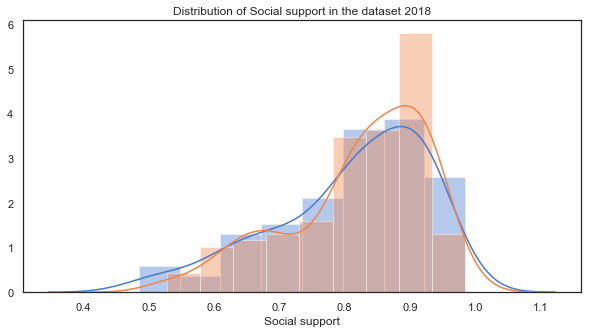

In [79]:
# plot the distribution of social support variable from the dataset, add title
sns.distplot(social)
plt.title("Distribution of Social support in the dataset 2018");
# plot the distribution of the resampled social support variable, add title etc
sns.distplot(boot_sample);

#### Compare the results of the simulation to the actual data:

In [80]:
print("Samples from the simulation:")
print(f"The mean of simulated data is: {boot_sample.mean():.3f} while the mean of my dataset is {dfh['Social support'].mean():.3f}")
print(f"The minimum value in the simulated data is :{boot_sample.min():.3f} compared to the minimum value in the dataset is {dfh['Social support'].min():.3f}")
print(f"The maximum value in the simulated data is :{boot_sample.max():.3f} compared to the maximum value in the dataset is {dfh['Social support'].max():.3f}")
print(f"The standard deviation of simulated data is: {boot_sample.std():.3f} compared to the standard deviation of my dataset is {dfh['Social support'].std():.3f}")
print(f"The simulated dataset contains {len(boot_sample)} observations.")
      
print("The mean of simulated data = {:.3f}, the mean of actual data = {:.3f}".format(boot_sample.mean(), dfh['Social support'].mean()))



Samples from the simulation:
The mean of simulated data is: 0.822 while the mean of my dataset is 0.811
The minimum value in the simulated data is :0.528 compared to the minimum value in the dataset is 0.485
The maximum value in the simulated data is :0.984 compared to the maximum value in the dataset is 0.984
The standard deviation of simulated data is: 0.106 compared to the standard deviation of my dataset is 0.116
The simulated dataset contains 136 observations.
The mean of simulated data = 0.822, the mean of actual data = 0.811


Next using t-test to check if the actual sample and the simulated data come from the same distribution.

In [81]:
# Using Student's t-test adapted from Machinelearningmastery
from scipy.stats import ttest_ind
# testing if the simulated boot sample comes from same distribution as the Social support sample
stat, p = ttest_ind(boot_sample, df18['Social support'])
# print the t-test statistic and the p value
print('stat=%.3f, p=%.3f' % (stat, p))
# if p-value greater than alpha then it is very likely the samples come from the same underlying distribution.
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.885, p=0.377
Probably the same distribution


***
## Simulating Log GDP per capita
Now I am looking at the income variable in the form of the Log GDP per capita variable in the dataset.

The GDP per capita in the World Happiness Report dataset are in purchasing power parity at constant 2011 international dollar prices which are mainly from the World Development Indicators in 2018. Purchasing power parity is necessary when looking to compare GDP per capita between countries which is what the World Happiness Report seeks to do. Nominal GDP would be fine when just looking at a single country. The log of the GDP figures is taken.

Per capita GDP is the Total Gross Domestic Product for a country divided by its population and breaks down a country's GDP per person. As the World Happiness Report states this is considered a universal measure for gauging the prosperity of nations. 

The earlier plots showed that the distribution of log GPD per capita in the dataset is not normally distributed. Per capita GDP is generally a unimodal but skewed distribution. There are many regional variations in income across the world. The distribution of Log GPD per capita appears somewhat left skewed. 

The scatterplots above showed that it is positively correlated with life satisfaction, social support and healthy life expectancy.

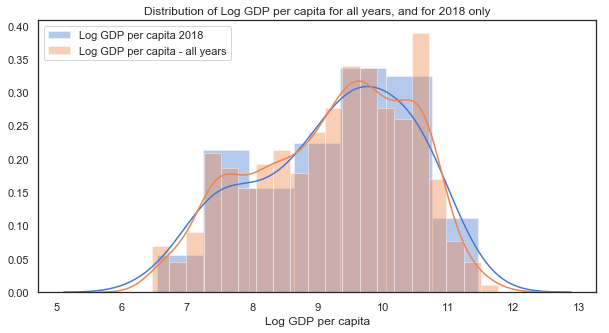

In [82]:
# plot the distribution of log gdp per capita for 2018
sns.distplot(dfh['Log GDP per capita'].dropna(), label="Log GDP per capita 2018")
# plot the distribution of Log GDP per capita based on all years available in the extended dataset
sns.distplot(df['Log GDP per capita'].dropna(), label="Log GDP per capita - all years", bins=20)
plt.title("Distribution of Log GDP per capita for all years, and for 2018 only")
plt.legend();

#### Boxplots to show the distribution of GDP per capita and the variations within Regions:

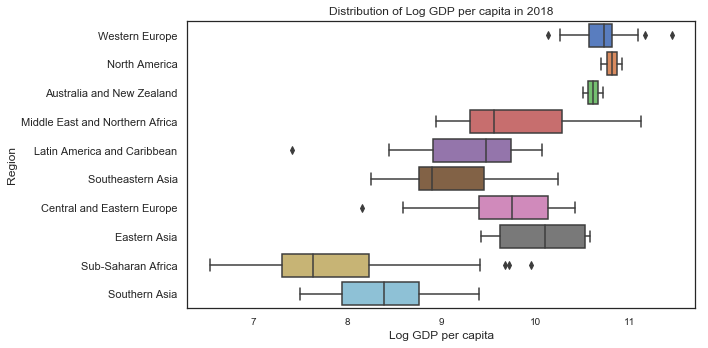

In [83]:
# set the figure size and label text size
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["xtick.labelsize"] = 10
# plot GDP per capita by region
sns.boxplot(y="Region", x="Log GDP per capita", data=dfh);
#add title
plt.title("Distribution of Log GDP per capita in 2018");
plt.tight_layout();

The boxplots below show that the median values of Log GPD per capita fall into roughly 3 groups (similar to the boxplots for social support) by regions with Western Europe, North America and Australia and New Zealand having the highest scores,  while Southern Asia and Sub Saharan Africa have the lowest median scores and are the most variable along with the Middle East and Nortern Africa region. There is no overlap at all between the measurements for the richer regions (such as Western Europe, Australia and North America) and the poorer regions (Sub_saharan Africa and Southern Asia).
The above boxplots by geographic regions show that there is great variations between regions in the distribution of GDP per capita.

#### Summary statistics of the Log GDP per capita variable from the dataset for 2018:


In [84]:
pd.options.display.max_rows=16 # set options to display max number of rows
# look at the statistics of Log GDP by region
dfh['Log GDP per capita'].groupby(dfh['Region']).describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Australia and New Zealand,2.0,10.611249,0.155241,10.501477,10.556363,10.611249,10.666135,10.721021
Central and Eastern Europe,25.0,9.681240,0.608695,8.151305,9.402726,9.749464,10.132390,10.419474
Eastern Asia,4.0,10.050819,0.584372,9.415703,9.624708,10.102977,10.529088,10.581618
Latin America and Caribbean,18.0,9.287006,0.672203,7.416092,8.914826,9.473041,9.744796,10.065920
Middle East and Northern Africa,11.0,9.819217,0.725599,8.937398,9.299217,9.557952,10.286746,11.127678
North America,2.0,10.811857,0.156424,10.701248,10.756552,10.811857,10.867161,10.922465
Southeastern Asia,8.0,9.106808,0.637545,8.253352,8.758870,8.899653,9.455828,10.235504
Southern Asia,6.0,8.393112,0.687759,7.494588,7.943442,8.391205,8.763126,9.400388
Sub-Saharan Africa,34.0,7.912544,0.886260,6.541033,7.309693,7.630573,8.233090,9.956448


#### Distribution of Log GDP per capita for 2018 by Region:

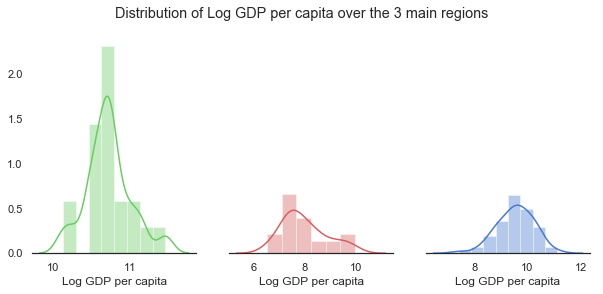

In [85]:
# https://seaborn.pydata.org/examples/distplot_options.html?highlight=tight_layout#distribution-plot-options
# set up the matplotlib figure,
sns.set(style="white", palette="muted", color_codes=True)
f,axes=plt.subplots(1,3, figsize=(10,4), sharey=True)
sns.despine(left=True)
sns.distplot(dfh.loc[dfh.loc[:,'Region'].isin(['Western Europe','Australia and New Zealand','North America'])]['Log GDP per capita'].dropna(), ax=axes[0],color="g")
#axes[0].set_title("Log GPD per capita for Western Europe, Australia, North America")
sns.distplot(dfh.loc[dfh.loc[:,'Region'].isin(['Sub-Saharan Africa','Southern Asia'])]['Log GDP per capita'].dropna(), ax=axes[1], color="r")
#axes[1].set_title("Log GDP per capital for Sub Saharan Africa, South Asia")
sns.distplot(dfh.loc[dfh.loc[:,'Region'].isin(['Eastern Asia','Southeastern Asia','Middle East and Northern Africa','Latin America and Caribbean','Central and Eastern Europe'])]['Log GDP per capita'].dropna(), ax=axes[2], color="b")
plt.suptitle("Distribution of Log GDP per capita over the 3 main regions");
#axes[2].set_title("Log GDP per capital for Eastern and Southeastern Asia, Middle East, Northern Africa, Latin America and Caribbean, Central and Eastern Europe")
#plt.setp(axes, yticks=[])
#sns.distplot(dfh.loc[dfh.loc[:,'Region'].isin(['Latin America and Caribbean'])]['Social support'], ax=axes[1,2])
# need to add legends..

The boxplots and the histograms above show that the GDP per capita for the Sub-Saharan and Southern Asia are normally distributed with lower levels of GDP than the richer regions of Western Europe, Australia and North America. The other two distributions when separated out do look more normal also.

#### References

<https://ec.europa.eu/eurostat/statistics-explained/index.php/Beginners:GDP_-_Comparing_GDP:_growth_rate_and_per_capita#How_can_the_GDP_of_countries_of_different_sizes_be_compared.3F>

- <https://www.thebalance.com/gdp-per-capita-formula-u-s-compared-to-highest-and-lowest-3305848>
- <https://www.investopedia.com/terms/p/per-capita-gdp.asp>

- <http://www.columbia.edu/~so33/SusDev/Lecture_1.pdf>


Before I go to simulate the Log GDP per capita I a going to see if the other two variables are similar in terms of their regional distributions. Then I may split the regions into three groups.


In [86]:
x1 = np.random.normal()

In [87]:
dfh['Log GDP per capita'].groupby(dfh['Region']).describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Australia and New Zealand,2.0,10.611249,0.155241,10.501477,10.556363,10.611249,10.666135,10.721021
Central and Eastern Europe,25.0,9.681240,0.608695,8.151305,9.402726,9.749464,10.132390,10.419474
Eastern Asia,4.0,10.050819,0.584372,9.415703,9.624708,10.102977,10.529088,10.581618
Latin America and Caribbean,18.0,9.287006,0.672203,7.416092,8.914826,9.473041,9.744796,10.065920
Middle East and Northern Africa,11.0,9.819217,0.725599,8.937398,9.299217,9.557952,10.286746,11.127678
North America,2.0,10.811857,0.156424,10.701248,10.756552,10.811857,10.867161,10.922465
Southeastern Asia,8.0,9.106808,0.637545,8.253352,8.758870,8.899653,9.455828,10.235504
Southern Asia,6.0,8.393112,0.687759,7.494588,7.943442,8.391205,8.763126,9.400388
Sub-Saharan Africa,34.0,7.912544,0.886260,6.541033,7.309693,7.630573,8.233090,9.956448


### Healthy Life Expectancy

According to the World Happiness Report, Healthy life expectancies at birth are based on the data extracted from the World Health Organization’s (WHO) Global Health Observatory data repository. Some interpolation  and exterpolation was used to get the data for the years covered in the 2018 report. As some countries were not covered in the WHO data, other sources were used by the researchers.

- Healthy life expectancy at birth from Table 2.1
- Explained by: Healthy life expectancy from Figure 2.6

#### Summary statistics of the Healthy life expectancy at birth variable from the dataset for 2018:

In [88]:
pd.options.display.max_rows=16 # set options to display max number of rows
# look at the statistics of Log GDP by region
dfh['Healthy life expectancy at birth'].groupby(dfh['Region']).describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Australia and New Zealand,2.0,73.399998,0.282844,73.199997,73.299997,73.399998,73.499998,73.599998
Central and Eastern Europe,26.0,66.767301,2.199957,62.200001,65.025000,66.850002,68.424999,71.099998
Eastern Asia,4.0,70.050000,5.707597,62.299999,67.550002,71.450001,73.949999,75.000000
Latin America and Caribbean,18.0,66.933334,3.375517,55.700001,66.174999,67.599998,68.725002,71.300003
Middle East and Northern Africa,13.0,65.600001,3.813354,56.700001,65.900002,66.300003,66.900002,73.300003
North America,2.0,70.950001,3.747663,68.300003,69.625002,70.950001,72.275000,73.599998
Southeastern Asia,9.0,64.688889,5.710615,58.700001,61.599998,62.099998,67.199997,76.800003
Southern Asia,6.0,61.033333,5.161266,52.599998,58.900000,61.799999,64.100002,67.199997
Sub-Saharan Africa,33.0,55.827273,3.712418,48.200001,53.900002,55.700001,57.900002,66.400002


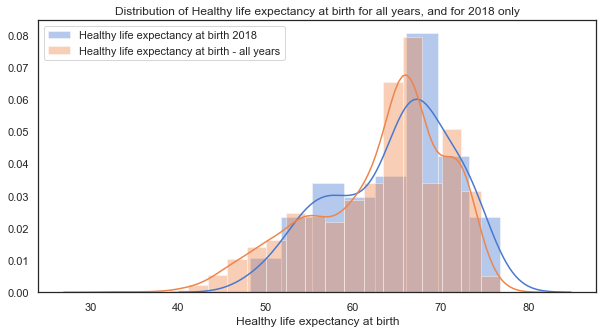

In [89]:
# plot the distribution of log gdp per capita for 2018
sns.distplot(dfh['Healthy life expectancy at birth'].dropna(), label="Healthy life expectancy at birth 2018")
# plot the distribution of Log GDP per capita based on all years available in the extended dataset
sns.distplot(df['Healthy life expectancy at birth'].dropna(), label="Healthy life expectancy at birth - all years", bins=20)
plt.title("Distribution of Healthy life expectancy at birth for all years, and for 2018 only")
plt.legend();

#### Boxplots to show the distribution of Healthy life expectancy at birth and the variations within Regions:

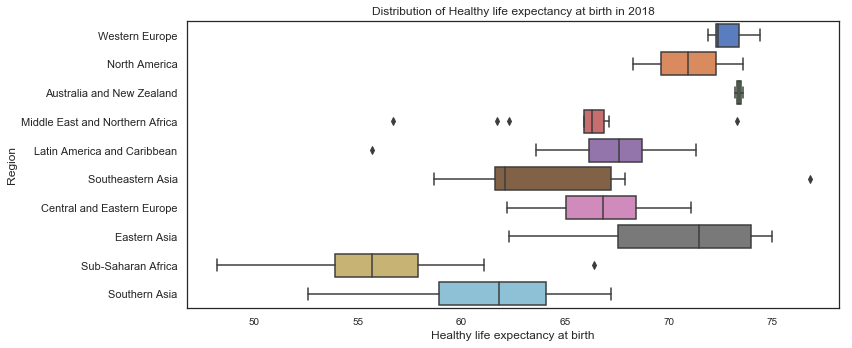

In [90]:
# set the figure size and label text size
plt.rcParams["figure.figsize"] = (12,5)
plt.rcParams["xtick.labelsize"] = 10
# plot GDP per capita by region
sns.boxplot(y="Region", x="Healthy life expectancy at birth", data=dfh);
#add title
plt.title("Distribution of Healthy life expectancy at birth in 2018");
plt.tight_layout();

The boxplots by regions show again a distinction between Western Europe, North America and Australia and the poorer regions fo Sub-Saharan Africa and Southern Asia. There is more overlap between regions than in the distributions of income and social support. 

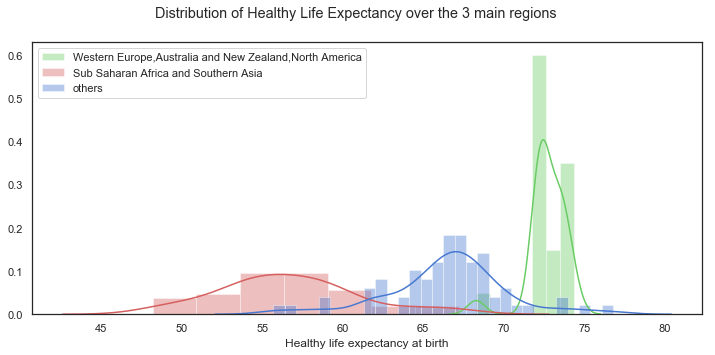

In [91]:
# set up the matplotlib figure,
sns.set(style="white", palette="muted", color_codes=True)
figsize=(10,4)
sns.despine(left=True)
sns.distplot(dfh.loc[dfh.loc[:,'Region'].isin(['Western Europe','Australia and New Zealand','North America'])]['Healthy life expectancy at birth'].dropna(),color="g", label="Western Europe,Australia and New Zealand,North America")
sns.distplot(dfh.loc[dfh.loc[:,'Region'].isin(['Sub-Saharan Africa','Southern Asia'])]['Healthy life expectancy at birth'].dropna(), color="r", label="Sub Saharan Africa and Southern Asia")
sns.distplot(dfh.loc[dfh.loc[:,'Region'].isin(['Eastern Asia','Southeastern Asia','Middle East and Northern Africa','Latin America and Caribbean','Central and Eastern Europe'])]['Healthy life expectancy at birth'].dropna(), color="b", label="others", bins=30)
plt.suptitle("Distribution of Healthy Life Expectancy over the 3 main regions");
plt.legend();
#axes[2].set_title("Log GDP per capital for Eastern and Southeastern Asia, Middle East, Northern Africa, Latin America and Caribbean, Central and Eastern Europe")
#plt.setp(axes, yticks=[])
#sns.distplot(dfh.loc[dfh.loc[:,'Region'].isin(['Latin America and Caribbean'])]['Social support'], ax=axes[1,2])
# need to add legends..

### Group by continent:
Below I create individual dataframes for each of the continents.
Now I will plot the distributions by region code groups.
- Region code 1, 7 - Sub-Saharan and Southern Asia
- Region code 9,10,3  - Australia and New Zealand, North America and Western Europe
- Region code 2,8,4,5,6 - Central and Eastern Europe,, Eastern Asia, Latin America and Caribbean,Middle East and Northern Africa, Southeastern Asia

In [127]:
pd.options.display.max_rows=12 # set options to display max number of rows
dfh.groupby('Region').mean()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,RegionCode
Region,,,,,
Australia and New Zealand,7.273640,10.611249,0.947000,73.399998,9
Central and Eastern Europe,5.647239,9.681240,0.872249,66.767301,2
Eastern Asia,5.557466,10.050819,0.853319,70.050000,8
Latin America and Caribbean,5.953038,9.287006,0.847512,66.933334,4
Middle East and Northern Africa,5.067794,9.819217,0.789676,65.600001,5
North America,7.029091,10.811857,0.913287,70.950001,10
Southeastern Asia,5.508884,9.106808,0.822206,64.688889,6
Southern Asia,4.298909,8.393112,0.688764,61.033333,7
Sub-Saharan Africa,4.519969,7.912544,0.691773,55.827273,1


In [115]:
# create dataframes for continents based on the regions using isin.
AmericaANZ = dfh.loc[dfh.loc[:,'Region'].isin(['Australia and New Zealand','North America','Latin America and Caribbean'])]
Europe = dfh.loc[dfh.loc[:,"Region"].isin(['Western Europe','Central and Eastern Europe'])]
AfricaMdEast=dfh.loc[dfh.loc[:,"Region"].isin(['Sub-Saharan Africa','Middle East and Northern Africa'])]
Asia=dfh.loc[dfh.loc[:,"Region"].isin(['Southeastern Asia','Southern Asia','Eastern Asia'])]

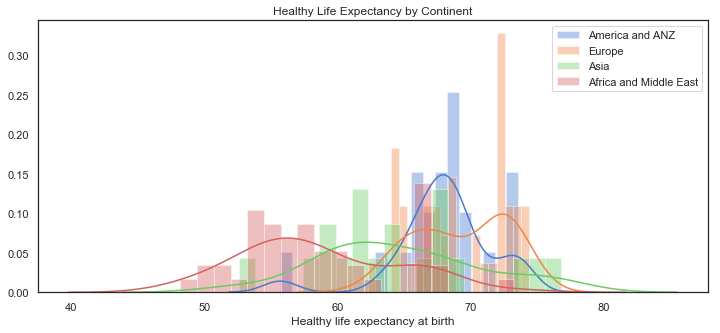

In [138]:
# plotting the distribution of Healthy Life Expectancy by continent:
sns.distplot(AmericaANZ['Healthy life expectancy at birth'].dropna(), bins=20, label="America and ANZ")
sns.distplot(Europe['Healthy life expectancy at birth'].dropna(), bins=20, label="Europe")
sns.distplot(Asia['Healthy life expectancy at birth'].dropna(), bins=20, label="Asia")
sns.distplot(AfricaMdEast['Healthy life expectancy at birth'].dropna(),bins=20, label="Africa and Middle East");
plt.title("Healthy Life Expectancy by Continent")
plt.legend();

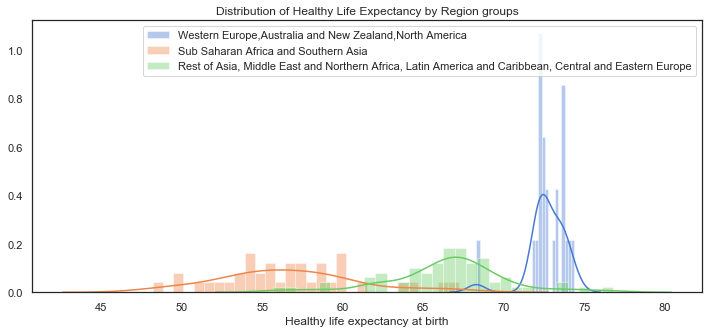

In [168]:
sns.distplot(dfh.loc[dfh.loc[:,'RegionCode'].isin([9,10,3])]['Healthy life expectancy at birth'].dropna(), bins=30,label="Western Europe,Australia and New Zealand,North America")
sns.distplot(dfh.loc[dfh.loc[:,'RegionCode'].isin([1,7])]['Healthy life expectancy at birth'].dropna(), bins=30,label="Sub Saharan Africa and Southern Asia")
sns.distplot(dfh.loc[dfh.loc[:,'RegionCode'].isin([2,8,4,5,6])]['Healthy life expectancy at birth'].dropna(), bins=30, label="Rest of Asia, Middle East and Northern Africa, Latin America and Caribbean, Central and Eastern Europe")
plt.legend()
plt.title("Distribution of Healthy Life Expectancy by Region groups");

### Simulating Healthy Life Expectancy by groups of regions:
Here I take the statistics for the 3 sub-groups of regions as plotted above. These look reasonably normal so I will try using a normal distribution to simulate values for 3 groups. Then I will plot against the original data to see if the shapes look ok.

In [189]:
# getting the statistics for the different groups of regions:
print("Statistics for group containing Western Europe, Australia and New Zealand, North America")
print(dfh.loc[dfh.loc[:,'RegionCode'].isin([9,10,3])]['Healthy life expectancy at birth'].describe(), "\n")
print("Statistics for group containing Sub-Saharan Africa and Southern Asia", sep="\n")
print(dfh.loc[dfh.loc[:,'RegionCode'].isin([1,7])]['Healthy life expectancy at birth'].describe(),"\n")
print("Statistics for group containing all other countries \n")
print(dfh.loc[dfh.loc[:,'RegionCode'].isin([2,8,4,5,6])]['Healthy life expectancy at birth'].describe(),"\n")

Statistics for group containing Western Europe, Australia and New Zealand, North America
count    23.000000
mean     72.700000
std       1.203026
min      68.300003
25%      72.300003
50%      72.599998
75%      73.599998
max      74.400002
Name: Healthy life expectancy at birth, dtype: float64 

Statistics for group containing Sub-Saharan Africa and Southern Asia
count    39.000000
mean     56.628205
std       4.328057
min      48.200001
25%      54.050001
50%      56.500000
75%      59.000000
max      67.199997
Name: Healthy life expectancy at birth, dtype: float64 

Statistics for group containing all other countries 

count    70.000000
mean     66.513569
std       3.697826
min      55.700001
25%      64.850002
50%      66.850002
75%      68.450001
max      76.800003
Name: Healthy life expectancy at birth, dtype: float64 



Using the mean, standard deviation and size of the original data, I will now simulate similar sized samples using a `numpy.random.normal` distribution function. The distributions for the groups are then plotted and compared to the original groups.

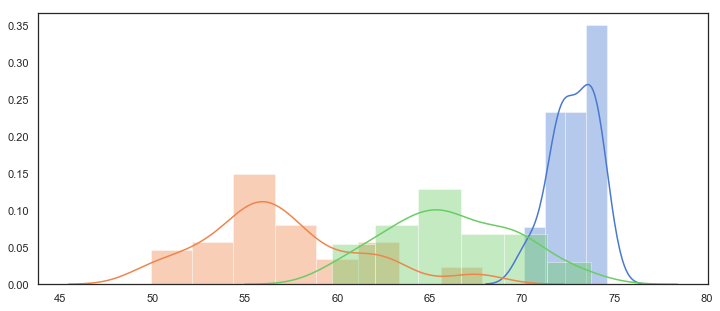

In [215]:
G1= np.random.normal(72.7,1.203,23)
sns.distplot(G1)
G2= np.random.normal(56.628205,4.328057,39)
sns.distplot(G2)
G3= np.random.normal(66.513569,3.697826,70)
sns.distplot(G3);

Now that the simulated distributions look similar to the distributions from the real data I will now add these to a dataframe. Pandas [`concat`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html?highlight=concat#pandas-concat) function can join series together so I first create a series from the numpy array a=of random numbers.

In [197]:
# create pandas series from the numpy array
G1=pd.Series(G1)
G2=pd.Series(G2)
G3=pd.Series(G3)

In [198]:
# using pandas concat function to join the series.
Sim_LifeExp = pd.concat([G1, G2,G3])


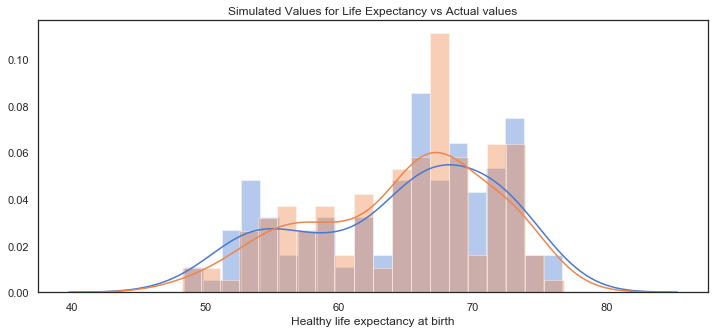

In [205]:
# plot the overall simulates life expectancy variable (over all groups) 
sns.distplot(Sim_LifeExp, bins=20)
# plot the original life expectancy values
sns.distplot(dfh['Healthy life expectancy at birth'].dropna(), bins=20)
plt.title("Simulated Values for Life Expectancy vs Actual values");

In [214]:
G1.mean()
G1.std()

1.0864974628248014

In [211]:
dfh['Healthy life expectancy at birth'].mean()
dfh['Healthy life expectancy at birth'].std()

6.728247435951595

### Distribution of Figure 2.6 variables for 2018 in the dataset at a  global level:

In [ ]:
# set up the subplots
sns.set(style="ticks", palette="muted")
f,axes=plt.subplots(2,2, figsize=(9,9))

# plot the distributions of each of the main variables. At global level first. Look at Regional after

sns.distplot(df6['Happiness score'].dropna(), ax=axes[0,0]);
axes[0,0].set_title("Distribution of Happiness score globally 2018");

sns.distplot(df6['Explained by: GDP per capita'].dropna(), ax=axes[0,1]);
axes[0,1].set_title("Explained by: GDP per capita 2018");

sns.distplot(df6['Explained by: Social support'].dropna(), ax=axes[1,0]);
axes[1,0].set_title("Explained by: Social support 2018");

sns.distplot(df6['Explained by: Healthy life expectancy'].dropna(), ax=axes[1,1]);
axes[1,1].set_title("Explained by: Healthy life expectancy 2018");
plt.tight_layout();
        

### Statistics for 2018 in the dataset at a  global level:

In [ ]:
print("The summary statistics for the data in Figure 2.6 of the World Happiness Report 2019:")
df6.describe()

## Overall Happiness score




### Distribution of Life Ladder and Happiness score variables:

Here I am looking at the statistics of the "Life Ladder" variables as well as the "Happiness score" variables from my three dataframes mentioned above. The distributions all seem to follow a normal distribution.
Then I will simulate some data  based on these statistics and plots.

In [ ]:
# simulate data for happiness score  and life ladder based on statistics above
HS = np.random.normal(5.407,1.113, 156)
LL=np.random.normal(5.502,1.103,156)

In [ ]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

sns.distplot(df['Life Ladder'], hist=False, label="all data Life Ladder");
sns.distplot(df18['Life Ladder'],hist=False, label="2018 Life Ladder");
sns.kdeplot(LL, label="Simulated data for Life Ladder", shade=True)
plt.suptitle("Distribution of actual and simulated Life Ladder for 2018");

In [ ]:
sns.distplot(df6['Happiness score'],hist=False, label="2018 Happiness score");
sns.kdeplot(HS, label="Simulated data for Happiness score 2018", shade=True)

plt.suptitle("Simulated and actual data for Happiness Score for 2018")

Note that while the life ladder data can be simulated like this, the happiness score is calculated based on the other variables so I don't think I should be directly simulating this. For here just to see what it looks like and how it relates to the life ladder. The happiness score is a bit left skewed.


In [ ]:
GDP=np.random.normal(9.222,1.18,1676)
sns.distplot(df['Log GDP per capita'].dropna(), label="Log GDP per capita to date")
sns.kdeplot(GDP,label="Simulate Log GDP per capita", shade=True)
plt.suptitle("Actual and Simulated GPD (log) per capita to date")
plt.legend;

In [ ]:
df18['Log GDP per capita'].describe()

In [ ]:
gdp18=np.random.normal(9.250,1.18,127)
sns.distplot(df18['Log GDP per capita'].dropna(), label="Log GDP per capita 2018")
sns.kdeplot(gdp18, shade=True, label="Simulated log GDP per capital 2018")
plt.legend()
plt.suptitle("Log GPD per capita 2018 -Actual and Simulated");

In [ ]:
df6['Explained by: GDP per capita'].describe()

In [ ]:
ExpGDP= np.random.normal(0.905,0.398,156)
sns.distplot(df6['Explained by: GDP per capita'].dropna(), label="Explained by: GDP per capita 2018")
sns.kdeplot(ExpGDP, label="simulated data")
plt.suptitle("Actual and Simulated Explained by GPD (log) data")
plt.legend();

In [ ]:
df.columns

In [ ]:
sns.distplot(df['Healthy life expectancy at birth'].dropna(), label="Healthy life expectancy at birth to date")
sns.kdeplot(HLE,label="Simulate Healthy life expectancy at birth", shade=True)
plt.suptitle("Actual and Simulated Healthy life expectancy at birth to date")
plt.legend;

## Regions and Countries

In [ ]:
dfh['Life Ladder'].describe()
dfh.groupby('Region').describe()

# subsetting to get dataframes per region.
WEur = df.loc[df.loc[:,'Region']=='Western Europe']
ANZ = df.loc[df.loc[:,'Region']=="Australia and New Zealand"]
CEE = df.loc[df.loc[:,'Region']=="Central and Eastern Europe"]
EA = df.loc[df.loc[:,'Region']=="Eastern Asia"]
LAC = df.loc[df.loc[:,'Region']=="Latin America and Caribbean"]
NA= df.loc[df.loc[:,'Region']=="North America"]
SEA=df.loc[df.loc[:,'Region']=="Southeastern Asia"]
SA=df.loc[df.loc[:,'Region']=="Southern Asia"]
SSA=df.loc[df.loc[:,'Region']=="Sub-Saharan Africa"]
MENA=df.loc[df.loc[:,'Region']=="Middle East and Northern Africa"]



In [ ]:
f,axes = plt.subplots(2,2,figsize=(12,8))
sns.distplot(WE['Life Ladder'].dropna(), ax=axes[0,0])
axes[0,0].set_title("Distribution of Life Ladder to date for Western Europe");
sns.distplot(ANZ['Life Ladder'].dropna(), ax=axes[0,1])
axes[0,1].set_title("Distribution of Life Ladder to date for Australia and New Zealand");
sns.distplot(CEE['Life Ladder'].dropna(), ax=axes[1,0])
axes[1,0].set_title("Distribution of Life Ladder to date for Central and Eastern Europe");
sns.distplot(EA['Life Ladder'].dropna(), ax=axes[1,1])
axes[1,1].set_title("Distribution of Life Ladder to date for Eastern Asia");

### Incomes and Happiness levels:

Higher national incomes go together with higher average life satisfaction. Countries with higher average national incomes tend to have higher average life satisfaction scores. The scatterplot below shows how higher levels of satisfaction or happiness are associated with higher levels of Log GDP per capita. This will need to be taken into consideration when simulating these two variables. 

In [ ]:
sns.scatterplot(y = df['Log GDP per capita'],x= df['Life Ladder'],hue=df['Region'])
plt.title("Life Satisfaction vs Log GDP per capita");

In [ ]:
sns.scatterplot(y = df2018['Log GDP per capita'],x= df2018['Life Ladder'],hue=df['Region'])
plt.title("Life Satisfaction vs Log GDP per capita in 2018");

```python
WEur = df.loc[df.loc[:,'Region']=='Western Europe']
ANZ = df.loc[df.loc[:,'Region']=="Australia and New Zealand"]
CEE = df.loc[df.loc[:,'Region']=="Central and Eastern Europe"]
EA = df.loc[df.loc[:,'Region']=="Eastern Asia"]
LAC = df.loc[df.loc[:,'Region']=="Latin America and Caribbean"]
NA= df.loc[df.loc[:,'Region']=="North America"]
SEA=df.loc[df.loc[:,'Region']=="Southeastern Asia"]
SA=df.loc[df.loc[:,'Region']=="Southern Asia"]
SSA=df.loc[df.loc[:,'Region']=="Sub-Saharan Africa"]
MENA=df.loc[df.loc[:,'Region']=="Middle East and Northern Africa"]
```


From the above boxplots by geographic regions it is evident that there is great variations between regions in the distribution of GDP per capita.

### Freedom to make life choices


#### Western Europe - Region 1
Simulate a dataset for a region containing 20 countries with data simulated to correspond to the distribution of the variables in Western Europe.
There are too little observations this way. Look at bootstrap or amalgamate regions with simular statistics.


```
WE = CR.loc[CR.loc[:,'Region']=='Western Europe']
# drop na (North Cyprus)
WE.dropna()
```

```python
# loop through each of the countries in the region and plot the distributions
Z = WE.dropna() # set Z to be western Europe countries
for i in Z.iloc[:, 3:]:
    print(Z[i].describe())
    # plot a distogram
    sns.distplot(Z[i])
    # need to close each histogram otherwise all will be plotted on the same figure
    plt.show()
```

In [ ]:
f,axes = plt.subplots(1,2,figsize=(12,4))

I could simulate the data for the 157 countries. Sort them so that they are in the same rank as the original dataset.
There are 10 different regions which will likely have different distributions. 


```python
# create a list of country names by appending number to Country
# setup empty list for country
country=[]
# use for loop to append a number to 'country'
for i in range(1,157):
#i=np.arange(1,141)
  country.append('Country'+str(i))
#set up empty list for region
region=[]
# loop through, append a number to 'Region'
for i in range(1,11):
    region.append('Region'+str(i))
print(country)
print(region)
```

```python
country=[]
region=[]
for i in range(1,11):
    region.append('Region'+str(i))
    for j in range(1,15):
        country.append('Country'+str(i))
#print(region)
print(country) 
```

### Simulate the distribution

sns.distplot(np.random.pareto(8.603, 1000));

### Average Life Expectancy

This is a left skewed distribution and is not normally distributed.
The mean is less than the median

The three most commonly used transformatiosn for quantitative data are the logarithm, the square root and the reciprocal. These are called variance_stabilising.

Pareto and Power distributions.

a,m = 71,50
s=(np.random.pareto(a,140)+1)*m
sns.distplot(s)

s= np.random.uniform(48.91,83.572,140)
sns.distplot(s)

a=76
samples =1400
s=np.random.power(a,samples)
sns.distplot(s)

In [ ]:
s

hpi16.groupby(['Region','Average_Life_Expectancy']).sum()

y= np.random.normal(70.925,8.725,140)#
sns.distplot(y)